# **Three day Stock Price Prediction**

#**Dataset Type:** 
####            **Flat**
####            **Medium-flat**
####            **Fluctuate**
**Dataset Download: https://finance.yahoo.com/**            

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


In [1]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import pandas_datareader as web
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Flat Dataset 3 Day Stock Price Prediction**

**Dataset Details: Honda Motor Company Ltd(HMC).**

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/HMC.csv', parse_dates=True, index_col=0)
df1.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072   13200
2000-07-03  16.750000  16.843750  16.718750  16.718750  10.788588   18400
2000-07-05  18.437500  18.437500  18.187500  18.203125  11.746451  126800
2000-07-06  18.140625  18.203125  17.921875  18.062500  11.655708   47600
2000-07-07  17.750000  17.937500  17.750000  17.859375  11.524632   27200

In [ ]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_1_3d = df1.resample('3D').agg(agg_dict)

In [ ]:
print(df_1_3d.head(10))
print('---------')
print(df_1_3d.tail(10))


                 Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072  13200.000000
2000-07-03  16.750000  18.437500  16.718750  18.203125  11.746451  72600.000000
2000-07-06  18.140625  18.203125  17.750000  17.859375  11.524632  37400.000000
2000-07-09  18.046875  18.500000  18.046875  18.359375  11.847281  77000.000000
2000-07-12  18.062500  18.468750  18.046875  18.250000  11.776699  54933.333333
2000-07-15  18.546875  18.609375  18.500000  18.500000  11.938021  25200.000000
2000-07-18  18.578125  18.593750  18.000000  18.421875  11.887611  36266.666667
2000-07-21  17.687500  17.687500  17.468750  17.625000  11.373391  74000.000000
2000-07-24  17.875000  18.468750  17.843750  17.968750  11.595211  27600.000000
2000-07-27  18.125000  18.203125  17.671875  17.750000  11.454054  39600.000000
---------
                 Open       Hi

In [ ]:
df_1_3d.shape

(2443, 6)

In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_3d.apply(num_missing, axis=1).head())

Missing values per column:
Open         44
High         44
Low          44
Close        44
Adj Close    44
Volume       44
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-03    0
2000-07-06    0
2000-07-09    0
2000-07-12    0
Freq: 3D, dtype: int64


In [ ]:
df_1_3d[['Open','High','Low','Close']] = df_1_3d[['Open','High','Low','Close']].replace(0, nan)
# print the first 10 rows of data
print(df_1_3d.head(10))

df_1_3d.dropna(inplace=True)



                 Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072  13200.000000
2000-07-03  16.750000  18.437500  16.718750  18.203125  11.746451  72600.000000
2000-07-06  18.140625  18.203125  17.750000  17.859375  11.524632  37400.000000
2000-07-09  18.046875  18.500000  18.046875  18.359375  11.847281  77000.000000
2000-07-12  18.062500  18.468750  18.046875  18.250000  11.776699  54933.333333
2000-07-15  18.546875  18.609375  18.500000  18.500000  11.938021  25200.000000
2000-07-18  18.578125  18.593750  18.000000  18.421875  11.887611  36266.666667
2000-07-21  17.687500  17.687500  17.468750  17.625000  11.373391  74000.000000
2000-07-24  17.875000  18.468750  17.843750  17.968750  11.595211  27600.000000
2000-07-27  18.125000  18.203125  17.671875  17.750000  11.454054  39600.000000


In [ ]:
# summarize the shape of the data with missing rows removed
df_1_3d.shape

(2399, 6)

In [ ]:
df_1_3d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2399 entries, 2000-06-30 to 2020-07-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2399 non-null   float64
 1   High       2399 non-null   float64
 2   Low        2399 non-null   float64
 3   Close      2399 non-null   float64
 4   Adj Close  2399 non-null   float64
 5   Volume     2399 non-null   float64
dtypes: float64(6)
memory usage: 131.2 KB


In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_1_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_1_3d.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-03    0
2000-07-06    0
2000-07-09    0
2000-07-12    0
dtype: int64


In [ ]:
df_1_3d.describe()

Open         High  ...    Adj Close        Volume
count  2399.000000  2399.000000  ...  2399.000000  2.399000e+03
mean     29.066494    29.431583  ...    22.868721  5.783944e+05
std       6.306309     6.329444  ...     6.219931  4.509634e+05
min      14.437500    15.500000  ...     9.010729  1.320000e+04
25%      24.415000    24.690001  ...    17.087362  2.963500e+05
50%      29.660000    30.080000  ...    24.412186  4.791500e+05
75%      33.935000    34.295000  ...    27.553605  7.320500e+05
max      44.340000    44.560001  ...    35.261700  5.998600e+06

[8 rows x 6 columns]

**Open, High, Low, Close Price History in Plot**

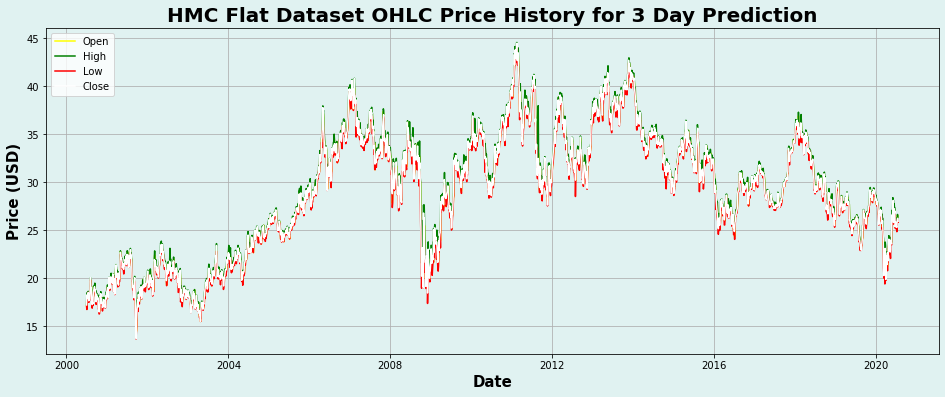

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.plot(df_1_3d["Open"], color = 'yellow')
plt.plot(df_1_3d["High"], color = 'green')
plt.plot(df_1_3d["Low"], color = 'red')
plt.plot(df_1_3d["Close"],color = 'white')
plt.title('HMC Flat Dataset OHLC Price History for 3 Day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

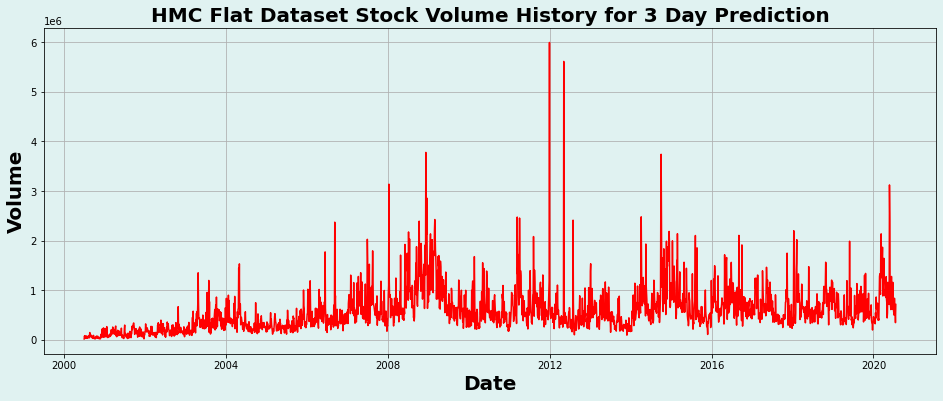

In [ ]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.plot(df_1_3d["Volume"], color = 'red')
plt.title('HMC Flat Dataset Stock Volume History for 3 Day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

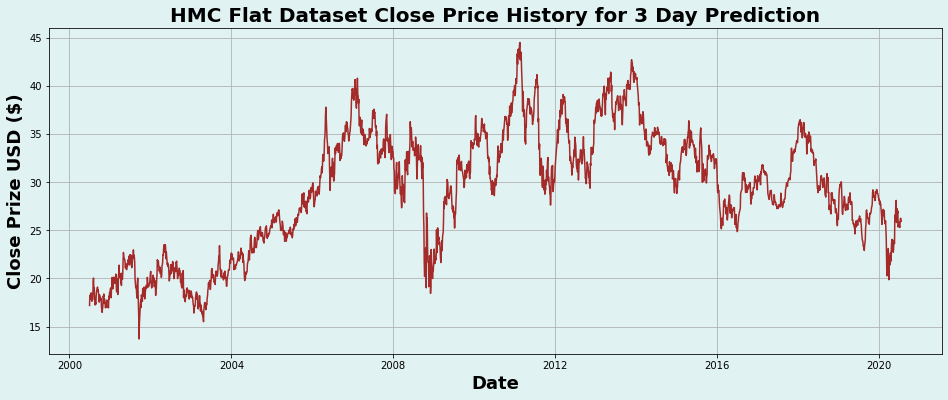

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
plt.title('HMC Flat Dataset Close Price History for 3 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_1_3d['Close'], color = 'brown')
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [ ]:
training_1 = df_1_3d[df_1_3d.index < datetime.datetime(year=2016, month=7, day=19)]
training_1

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072  1.320000e+04
2000-07-03  16.750000  18.437500  16.718750  18.203125  11.746451  7.260000e+04
2000-07-06  18.140625  18.203125  17.750000  17.859375  11.524632  3.740000e+04
2000-07-09  18.046875  18.500000  18.046875  18.359375  11.847281  7.700000e+04
2000-07-12  18.062500  18.468750  18.046875  18.250000  11.776699  5.493333e+04
...               ...        ...        ...        ...        ...           ...
2016-07-06  24.290001  25.139999  24.030001  25.090000  22.376274  9.166333e+05
2016-07-09  25.639999  25.860001  25.590000  25.780001  22.991646  1.110600e+06
2016-07-12  26.059999  26.459999  25.760000  25.930000  23.125423  1.148300e+06
2016-07-15  26.500000  26.639999  26.450001  26.469999  23.607014  1.117300e+06
2016-07-18  26.500000  26.709999  26.420000  26.580000  23.705118  7.245667e+05

[1921 rows x 6 columns]

In [ ]:
testing_1 = df_1_3d[df_1_3d.index >= datetime.datetime(year=2016, month=7, day=19)]
testing_1

Open       High  ...  Adj Close         Volume
Date                              ...                          
2016-07-21  27.080000  27.170000  ...  23.919161  675800.000000
2016-07-24  26.910000  26.980000  ...  24.044014  431500.000000
2016-07-27  27.139999  27.360001  ...  24.186708  853533.333333
2016-07-30  27.120001  27.469999  ...  24.338324  829600.000000
2016-08-02  28.059999  28.809999  ...  25.676086  961866.666667
...               ...        ...  ...        ...            ...
2020-07-09  25.430000  25.430000  ...  25.280001  834850.000000
2020-07-12  26.100000  26.129999  ...  25.950001  597600.000000
2020-07-15  26.570000  26.629999  ...  26.230000  566200.000000
2020-07-18  26.100000  26.250000  ...  26.219999  342800.000000
2020-07-21  25.850000  26.055000  ...  25.924999  710344.000000

[478 rows x 6 columns]

**Training & Testing Conbination**

<function matplotlib.pyplot.show>

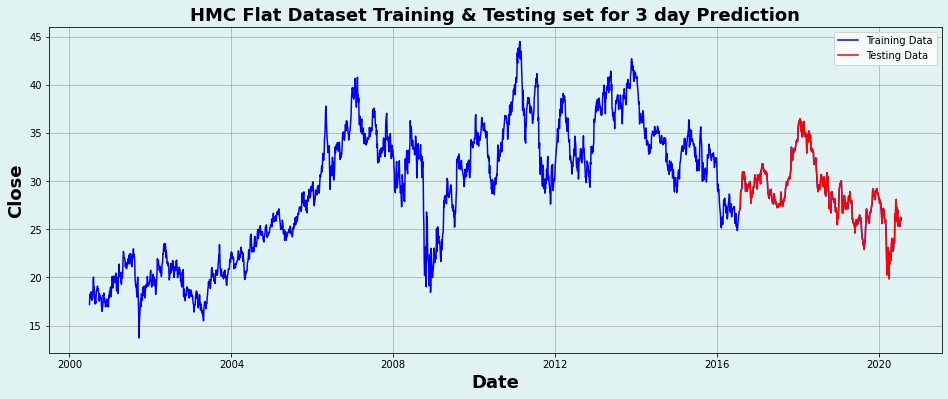

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#e0f2f1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e0f2f1')
training_1, testing_1 =  df_1_3d[ df_1_3d.index < datetime.datetime(year=2016, month=7, day=19)],  df_1_3d[ df_1_3d.index >= datetime.datetime(year=2016, month=7, day=19)]
#plt.figure(figsize=(12,7))
plt.title('HMC Flat Dataset Training & Testing set for 3 day Prediction', fontsize = 18,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot( df_1_3d['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [ ]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date                 
2000-06-30  17.187500
2000-07-03  18.203125
2000-07-06  17.859375
2000-07-09  18.359375
2000-07-12  18.250000
...               ...
2016-07-06  25.090000
2016-07-09  25.780001
2016-07-12  25.930000
2016-07-15  26.469999
2016-07-18  26.580000

[1921 rows x 1 columns]

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.820000
2016-07-24  26.959999
2016-07-27  27.120001
2016-07-30  27.290001
2016-08-02  28.790001
...               ...
2020-07-09  25.280001
2020-07-12  25.950001
2020-07-15  26.230000
2020-07-18  26.219999
2020-07-21  25.924999

[478 rows x 1 columns]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.11305124],
       [0.14604482],
       [0.13487776],
       ...,
       [0.39705999],
       [0.41460239],
       [0.41817588]])

In [ ]:
X_train_1 = []
y_train_1 = []
#length_1 = len(testing_length_1)
for i in range(30, 1921):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.11305124 0.14604482 0.13487776 0.15112076 0.1475676  0.1556891
 0.15315113 0.12726386 0.13843092 0.13132461 0.1394461  0.19325102
 0.20543327 0.1638106  0.17243969 0.14350685 0.12320311 0.11457402
 0.12320311 0.11711199 0.14350685 0.15974985 0.16533338 0.16990172
 0.17497765 0.16178022 0.16584097 0.15315113 0.14858279 0.1242183 ]


0.14909038258163682


In [ ]:
X_train_1.shape

(1891, 30)

In [ ]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(1891, 30, 1)

**Build RNN Model**

In [ ]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=128))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 30, 128)           16640     
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 49,665
Trainable params: 49,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 31ms/step - loss: 0.1489 - mae: 0.3143 - mse: 0.1489
Epoch 2/1

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.820000
2016-07-24  26.959999
2016-07-27  27.120001
2016-07-30  27.290001
2016-08-02  28.790001
...               ...
2020-07-09  25.280001
2020-07-12  25.950001
2020-07-15  26.230000
2020-07-18  26.219999
2020-07-21  25.924999

[478 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[29.790001],
       [29.690001],
       [29.950001],
       [29.82    ],
       [28.379999],
       [27.709999],
       [28.43    ],
       [28.25    ],
       [28.52    ],
       [28.950001],
       [28.709999],
       [28.68    ],
       [29.41    ],
       [29.41    ],
       [29.370001],
       [29.43    ],
       [30.32    ],
       [30.629999],
       [30.01    ],
       [30.129999],
       [30.16    ],
       [30.209999],
       [29.280001],
       [29.190001],
       [30.66    ],
       [30.469999],
       [30.1     ],
       [30.08    ],
       [30.35    ],
       [30.440001],
       [30.790001],
       [30.08    ],
       [29.719999],
       [31.059999],
       [30.870001],
       [31.33    ],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.780001],
       [31.450001],
       [31.24    ],
       [30.99    ],
       [31.15    ],
       [30.940001],
       [31.049999],
       [30.75    ],
       [31.040001],
       [30.99    ],
       [30.73    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42597252],
       [0.43052053],
       [0.43571835],
       [0.44124097],
       [0.48996995],
       [0.4954925 ],
       [0.50004057],
       [0.50166487],
       [0.50588809],
       [0.5497441 ],
       [0.56078934],
       [0.54941931],
       [0.53674974],
       [0.55559158],
       [0.56046448],
       [0.55429218],
       [0.5322017 ],
       [0.54259722],
       [0.51238525],
       [0.4941931 ],
       [0.52180619],
       [0.51271011],
       [0.49841624],
       [0.4941931 ],
       [0.49711684],
       [0.51595871],
       [0.5117355 ],
       [0.50588809],
       [0.51011123],
       [0.51368469],
       [0.52245594],
       [0.51920734],
       [0.5276537 ],
       [0.52343049],
       [0.47665063],
       [0.45488502],
       [0.47827496],
       [0.47242748],
       [0.4811987 ],
       [0.49516771],
       [0.48737101],
       [0.48639646],
       [0.51011123],
       [0.51011123],
       [0.50881182],
       [0.51076095],
       [0.53967348],
       [0.549

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(448, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.42597252]
  [0.43052053]
  [0.43571835]
  ...
  [0.50588809]
  [0.51011123]
  [0.51368469]]

 [[0.43052053]
  [0.43571835]
  [0.44124097]
  ...
  [0.51011123]
  [0.51368469]
  [0.52245594]]

 [[0.43571835]
  [0.44124097]
  [0.48996995]
  ...
  [0.51368469]
  [0.52245594]
  [0.51920734]]

 ...

 [[0.25022332]
  [0.2898562 ]
  [0.26224317]
  ...
  [0.37886787]
  [0.37594413]
  [0.39770974]]

 [[0.2898562 ]
  [0.26224317]
  [0.29310483]
  ...
  [0.37594413]
  [0.39770974]
  [0.40680579]]

 [[0.26224317]
  [0.29310483]
  [0.32039306]
  ...
  [0.39770974]
  [0.40680579]
  [0.4064809 ]]]


In [ ]:
RNN_1_Stock_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Stock_Price_Prediction_1 = sc.inverse_transform(RNN_1_Stock_Price_Prediction_1)

In [ ]:
print(RNN_1_Stock_Price_Prediction_1)

[[29.56957 ]
 [29.878723]
 [29.72076 ]
 [30.035158]
 [29.960676]
 [28.6275  ]
 [27.852169]
 [28.49133 ]
 [28.505262]
 [28.644377]
 [28.978539]
 [28.868025]
 [28.772898]
 [29.432114]
 [29.493332]
 [29.436834]
 [29.546474]
 [30.320143]
 [30.549234]
 [30.127176]
 [30.315186]
 [30.333416]
 [30.266006]
 [29.360817]
 [29.32836 ]
 [30.672901]
 [30.548306]
 [30.197495]
 [30.145359]
 [30.466492]
 [30.591816]
 [30.746618]
 [30.12844 ]
 [29.880945]
 [31.143976]
 [30.909002]
 [31.20206 ]
 [31.691195]
 [31.969564]
 [31.593493]
 [31.643982]
 [31.494432]
 [31.418074]
 [31.172136]
 [31.172089]
 [30.956282]
 [31.223322]
 [30.92394 ]
 [31.130632]
 [31.009924]
 [30.747078]
 [30.915424]
 [30.889917]
 [30.330727]
 [29.791199]
 [29.032028]
 [28.838316]
 [28.668009]
 [28.377394]
 [28.586065]
 [29.073458]
 [29.217396]
 [29.093864]
 [29.084135]
 [29.231892]
 [28.649725]
 [28.265524]
 [28.109253]
 [27.886797]
 [27.96295 ]
 [27.828815]
 [27.794079]
 [28.047937]
 [28.749865]
 [28.377855]
 [28.00424 ]
 [28.107088]

<function matplotlib.pyplot.show>

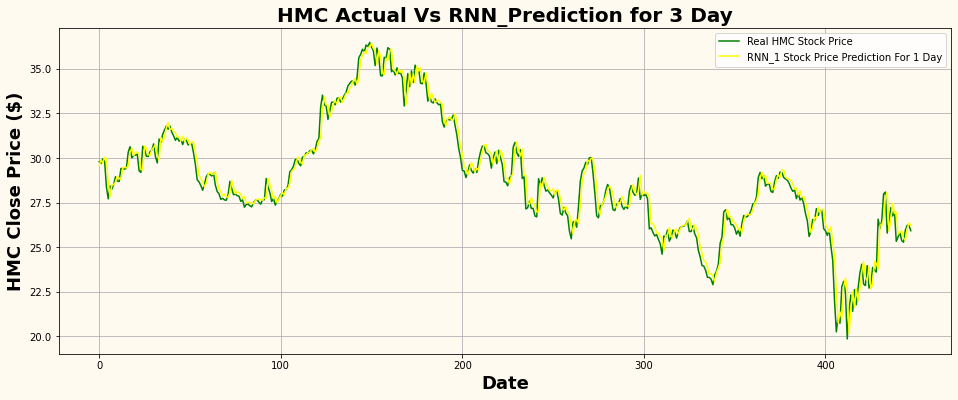

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real HMC Stock Price')
plt.plot(RNN_1_Stock_Price_Prediction_1, color = 'yellow', label = 'RNN_1 Stock Price Prediction For 1 Day')
plt.title('HMC Actual Vs RNN_Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Stock_Price_Prediction_1))

R Squared = 0.9630579253043782


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.4394975309832437


In [ ]:
def mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1): 
    y_test_1, RNN_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - RNN_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1))  

Mean Absolute Percentage Error: 1.5896216046645575


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.37873367775726113


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.6154134201959371


**Build LSTM Model**

In [ ]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=256))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 256)           264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 9s 315ms/step - loss: 0.0239 - mae: 0.0985 - mse: 0.0239
Epoc

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.820000
2016-07-24  26.959999
2016-07-27  27.120001
2016-07-30  27.290001
2016-08-02  28.790001
...               ...
2020-07-09  25.280001
2020-07-12  25.950001
2020-07-15  26.230000
2020-07-18  26.219999
2020-07-21  25.924999

[478 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[29.790001],
       [29.690001],
       [29.950001],
       [29.82    ],
       [28.379999],
       [27.709999],
       [28.43    ],
       [28.25    ],
       [28.52    ],
       [28.950001],
       [28.709999],
       [28.68    ],
       [29.41    ],
       [29.41    ],
       [29.370001],
       [29.43    ],
       [30.32    ],
       [30.629999],
       [30.01    ],
       [30.129999],
       [30.16    ],
       [30.209999],
       [29.280001],
       [29.190001],
       [30.66    ],
       [30.469999],
       [30.1     ],
       [30.08    ],
       [30.35    ],
       [30.440001],
       [30.790001],
       [30.08    ],
       [29.719999],
       [31.059999],
       [30.870001],
       [31.33    ],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.780001],
       [31.450001],
       [31.24    ],
       [30.99    ],
       [31.15    ],
       [30.940001],
       [31.049999],
       [30.75    ],
       [31.040001],
       [30.99    ],
       [30.73    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42597252],
       [0.43052053],
       [0.43571835],
       [0.44124097],
       [0.48996995],
       [0.4954925 ],
       [0.50004057],
       [0.50166487],
       [0.50588809],
       [0.5497441 ],
       [0.56078934],
       [0.54941931],
       [0.53674974],
       [0.55559158],
       [0.56046448],
       [0.55429218],
       [0.5322017 ],
       [0.54259722],
       [0.51238525],
       [0.4941931 ],
       [0.52180619],
       [0.51271011],
       [0.49841624],
       [0.4941931 ],
       [0.49711684],
       [0.51595871],
       [0.5117355 ],
       [0.50588809],
       [0.51011123],
       [0.51368469],
       [0.52245594],
       [0.51920734],
       [0.5276537 ],
       [0.52343049],
       [0.47665063],
       [0.45488502],
       [0.47827496],
       [0.47242748],
       [0.4811987 ],
       [0.49516771],
       [0.48737101],
       [0.48639646],
       [0.51011123],
       [0.51011123],
       [0.50881182],
       [0.51076095],
       [0.53967348],
       [0.549

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(448, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(448, 30, 1)

In [ ]:
LSTM_1_Stock_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Stock_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Stock_Price_Prediction_1)

In [ ]:
print(LSTM_1_Stock_Price_Prediction_1)

[[29.362164]
 [29.602226]
 [29.561836]
 [29.76037 ]
 [29.694082]
 [28.520031]
 [27.77575 ]
 [28.237461]
 [28.211061]
 [28.38909 ]
 [28.755743]
 [28.619461]
 [28.552668]
 [29.13425 ]
 [29.251251]
 [29.223417]
 [29.268364]
 [30.010117]
 [30.399578]
 [29.935598]
 [29.952005]
 [30.005713]
 [30.062845]
 [29.317514]
 [29.112667]
 [30.297308]
 [30.349628]
 [30.006884]
 [29.931051]
 [30.156425]
 [30.275572]
 [30.577646]
 [30.041145]
 [29.653149]
 [30.707222]
 [30.738714]
 [31.086819]
 [31.33946 ]
 [31.555777]
 [31.43748 ]
 [31.566956]
 [31.323912]
 [31.118193]
 [30.892626]
 [30.998037]
 [30.843988]
 [30.902195]
 [30.66252 ]
 [30.858469]
 [30.851768]
 [30.626844]
 [30.631565]
 [30.647503]
 [30.213488]
 [29.627836]
 [28.846447]
 [28.629467]
 [28.437498]
 [28.185766]
 [28.388287]
 [28.776106]
 [28.945353]
 [28.940527]
 [28.861084]
 [28.971832]
 [28.472187]
 [28.089968]
 [27.930521]
 [27.66554 ]
 [27.657269]
 [27.586082]
 [27.54657 ]
 [27.770096]
 [28.418655]
 [28.219057]
 [27.876879]
 [27.850641]

<function matplotlib.pyplot.show>

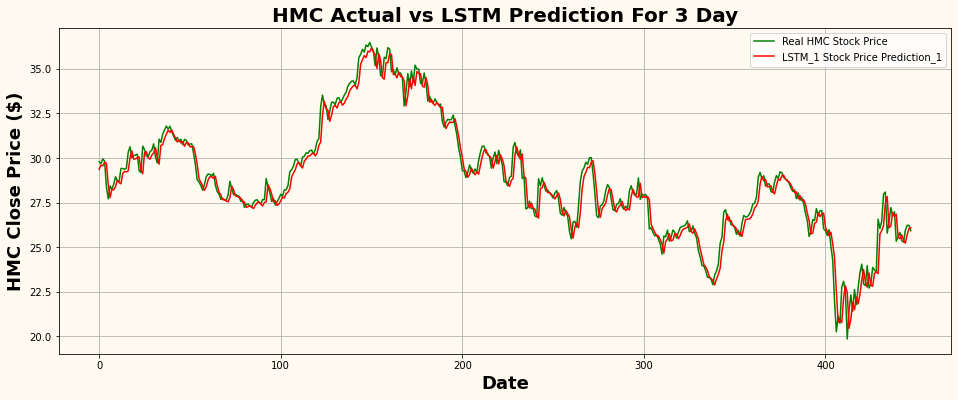

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real HMC Stock Price')
plt.plot(LSTM_1_Stock_Price_Prediction_1, color = 'red', label = 'LSTM_1 Stock Price Prediction_1')
plt.title('HMC Actual vs LSTM Prediction For 3 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Stock_Price_Prediction_1))

R Squared = 0.9620494768941413


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.44340345355905797


In [ ]:
def mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1): 
    y_test_1, LSTM_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - LSTM_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 1.587025457525895


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.3890723871660949


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.6237566730433389


**Build GRU Model**

In [ ]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=512, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=512))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 512)           791040    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 512)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 2,367,489
Trainable params: 2,367,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 24s 800ms/step - loss: 0.0314 - mae: 0.1182 - mse: 0.0314

In [ ]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-21  26.820000
2016-07-24  26.959999
2016-07-27  27.120001
2016-07-30  27.290001
2016-08-02  28.790001
...               ...
2020-07-09  25.280001
2020-07-12  25.950001
2020-07-15  26.230000
2020-07-18  26.219999
2020-07-21  25.924999

[478 rows x 1 columns]

In [ ]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[29.790001],
       [29.690001],
       [29.950001],
       [29.82    ],
       [28.379999],
       [27.709999],
       [28.43    ],
       [28.25    ],
       [28.52    ],
       [28.950001],
       [28.709999],
       [28.68    ],
       [29.41    ],
       [29.41    ],
       [29.370001],
       [29.43    ],
       [30.32    ],
       [30.629999],
       [30.01    ],
       [30.129999],
       [30.16    ],
       [30.209999],
       [29.280001],
       [29.190001],
       [30.66    ],
       [30.469999],
       [30.1     ],
       [30.08    ],
       [30.35    ],
       [30.440001],
       [30.790001],
       [30.08    ],
       [29.719999],
       [31.059999],
       [30.870001],
       [31.33    ],
       [31.57    ],
       [31.790001],
       [31.610001],
       [31.780001],
       [31.450001],
       [31.24    ],
       [30.99    ],
       [31.15    ],
       [30.940001],
       [31.049999],
       [30.75    ],
       [31.040001],
       [30.99    ],
       [30.73    ],


In [ ]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.42597252],
       [0.43052053],
       [0.43571835],
       [0.44124097],
       [0.48996995],
       [0.4954925 ],
       [0.50004057],
       [0.50166487],
       [0.50588809],
       [0.5497441 ],
       [0.56078934],
       [0.54941931],
       [0.53674974],
       [0.55559158],
       [0.56046448],
       [0.55429218],
       [0.5322017 ],
       [0.54259722],
       [0.51238525],
       [0.4941931 ],
       [0.52180619],
       [0.51271011],
       [0.49841624],
       [0.4941931 ],
       [0.49711684],
       [0.51595871],
       [0.5117355 ],
       [0.50588809],
       [0.51011123],
       [0.51368469],
       [0.52245594],
       [0.51920734],
       [0.5276537 ],
       [0.52343049],
       [0.47665063],
       [0.45488502],
       [0.47827496],
       [0.47242748],
       [0.4811987 ],
       [0.49516771],
       [0.48737101],
       [0.48639646],
       [0.51011123],
       [0.51011123],
       [0.50881182],
       [0.51076095],
       [0.53967348],
       [0.549

In [ ]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(448, 30)

In [ ]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(448, 30, 1)

In [ ]:
GRU_1_Stock_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Stock_Price_Prediction_1 = sc.inverse_transform(GRU_1_Stock_Price_Prediction_1)

In [ ]:
print(GRU_1_Stock_Price_Prediction_1)

[[29.437225]
 [29.691496]
 [29.609123]
 [29.856522]
 [29.749613]
 [28.392181]
 [27.719065]
 [28.36431 ]
 [28.174541]
 [28.399414]
 [28.82276 ]
 [28.610725]
 [28.58446 ]
 [29.28379 ]
 [29.30424 ]
 [29.270628]
 [29.344944]
 [30.190369]
 [30.510235]
 [29.945698]
 [30.065128]
 [30.106813]
 [30.14298 ]
 [29.269306]
 [29.15531 ]
 [30.530472]
 [30.372007]
 [30.02049 ]
 [30.024818]
 [30.280558]
 [30.364729]
 [30.696507]
 [30.047304]
 [29.692589]
 [30.946321]
 [30.790468]
 [31.214167]
 [31.484415]
 [31.706747]
 [31.559473]
 [31.725597]
 [31.427618]
 [31.218288]
 [30.976809]
 [31.108973]
 [30.906332]
 [30.995476]
 [30.71697 ]
 [30.97587 ]
 [30.936995]
 [30.686396]
 [30.73027 ]
 [30.739576]
 [30.235346]
 [29.62539 ]
 [28.791615]
 [28.64098 ]
 [28.412878]
 [28.132477]
 [28.423075]
 [28.838366]
 [28.977425]
 [28.97273 ]
 [28.902534]
 [29.049025]
 [28.433548]
 [28.072704]
 [27.93749 ]
 [27.622515]
 [27.653957]
 [27.561502]
 [27.529951]
 [27.81029 ]
 [28.534042]
 [28.181082]
 [27.851479]
 [27.897888]

<function matplotlib.pyplot.show>

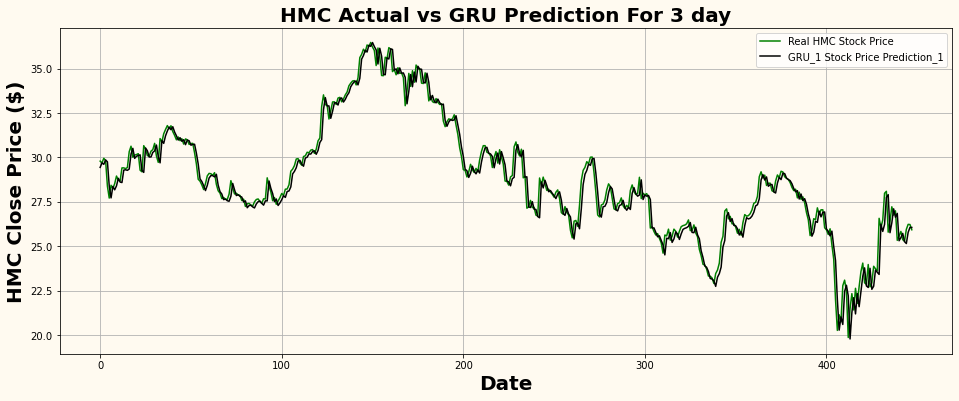

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#fffaf0')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fffaf0')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'green', label = 'Real HMC Stock Price')
plt.plot(GRU_1_Stock_Price_Prediction_1, color = 'black', label = 'GRU_1 Stock Price Prediction_1')
plt.title('HMC Actual vs GRU Prediction For 3 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 20,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Stock_Price_Prediction_1))

R Squared = 0.9633967703432852


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.4282788785863603


In [ ]:
def mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1): 
    y_test_1, GRU_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - GRU_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 1.54133563821652


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.37525980605859693


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.6125845297251612


# **Medium Flat Dataset 3 Day Stock Price Prediction**


**Datase Details : Oracle Corporation (ORCL)**

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/ORCL.csv', parse_dates=True, index_col=0)
df2.head()

Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-06-30  40.18750  42.2500  40.00000  42.03125  36.270248  38093000
2000-07-03  40.56250  40.8750  39.43750  40.09375  34.598320  42136200
2000-07-05  38.40625  38.8125  36.09375  36.15625  31.200495  94634200
2000-07-06  35.87500  37.9375  35.87500  37.81250  32.629742  50533000
2000-07-07  37.96875  38.5000  37.75000  37.93750  32.737595  31480200

In [ ]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_2_3d = df2.resample('3D').agg(agg_dict)

In [ ]:
print(df_2_3d.head(10))
print('---------')
print(df_2_3d.tail(10))

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-06-30  40.18750  42.25000  40.00000  42.03125  36.270248  3.809300e+07
2000-07-03  40.56250  40.87500  36.09375  36.15625  31.200495  6.838520e+07
2000-07-06  35.87500  38.50000  35.87500  37.93750  32.737595  4.100660e+07
2000-07-09  37.31250  37.75000  35.56250  36.15625  31.200495  4.303950e+07
2000-07-12  36.71875  38.31250  36.50000  38.06250  32.845470  3.590193e+07
2000-07-15  37.65625  39.00000  37.03125  38.06250  32.845470  3.238880e+07
2000-07-18  37.84375  39.50000  36.50000  39.06250  33.708412  3.230253e+07
2000-07-21  38.71875  38.84375  37.53125  37.71875  32.548840  3.092500e+07
2000-07-24  38.56250  39.31250  37.03125  38.37500  33.115131  3.233493e+07
2000-07-27  37.96875  39.00000  35.53125  36.18750  31.227459  3.287120e+07
---------
                 Open       High        Low      Close  Adj Close        Volum

In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_2_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_2_3d.apply(num_missing, axis=1).head())


Missing values per column:
Open         44
High         44
Low          44
Close        44
Adj Close    44
Volume       44
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-03    0
2000-07-06    0
2000-07-09    0
2000-07-12    0
Freq: 3D, dtype: int64


In [ ]:
df_2_3d[['Open','High','Low','Close']] = df_2_3d[['Open','High','Low','Close']].replace(0, nan)
# print the first 10 rows of data
print(df_2_3d.head(10))

df_2_3d.dropna(inplace=True)

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-06-30  40.18750  42.25000  40.00000  42.03125  36.270248  3.809300e+07
2000-07-03  40.56250  40.87500  36.09375  36.15625  31.200495  6.838520e+07
2000-07-06  35.87500  38.50000  35.87500  37.93750  32.737595  4.100660e+07
2000-07-09  37.31250  37.75000  35.56250  36.15625  31.200495  4.303950e+07
2000-07-12  36.71875  38.31250  36.50000  38.06250  32.845470  3.590193e+07
2000-07-15  37.65625  39.00000  37.03125  38.06250  32.845470  3.238880e+07
2000-07-18  37.84375  39.50000  36.50000  39.06250  33.708412  3.230253e+07
2000-07-21  38.71875  38.84375  37.53125  37.71875  32.548840  3.092500e+07
2000-07-24  38.56250  39.31250  37.03125  38.37500  33.115131  3.233493e+07
2000-07-27  37.96875  39.00000  35.53125  36.18750  31.227459  3.287120e+07


In [ ]:
# summarize the shape of the data with missing rows removed
df_2_3d.shape

(2398, 6)

In [ ]:

df_2_3d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2398 entries, 2000-06-30 to 2020-07-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2398 non-null   float64
 1   High       2398 non-null   float64
 2   Low        2398 non-null   float64
 3   Close      2398 non-null   float64
 4   Adj Close  2398 non-null   float64
 5   Volume     2398 non-null   float64
dtypes: float64(6)
memory usage: 131.1 KB


In [ ]:

df_2_3d.describe()

Open         High  ...    Adj Close        Volume
count  2398.000000  2398.000000  ...  2398.000000  2.398000e+03
mean     28.704298    29.207550  ...    26.215818  3.015410e+07
std      13.879944    14.003879  ...    13.838982  1.824482e+07
min       7.390000     7.960000  ...     6.592824  4.013100e+06
25%      15.592500    16.022500  ...    13.384126  1.577142e+07
50%      27.505000    28.475001  ...    24.296354  2.755402e+07
75%      40.189374    40.692500  ...    36.927138  3.946814e+07
max      60.090000    60.500000  ...    58.691143  2.037072e+08

[8 rows x 6 columns]

**Open, High, Low, Close Price History**

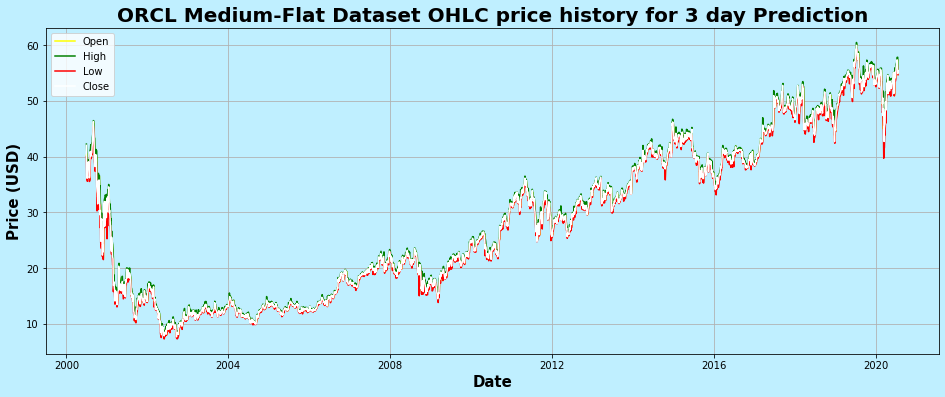

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#bfefff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bfefff')
plt.plot(df_2_3d["Open"], color = 'yellow')
plt.plot(df_2_3d["High"], color = 'green')
plt.plot(df_2_3d["Low"], color = 'red')
plt.plot(df_2_3d["Close"],color = 'white')
plt.title('ORCL Medium-Flat Dataset OHLC price history for 3 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

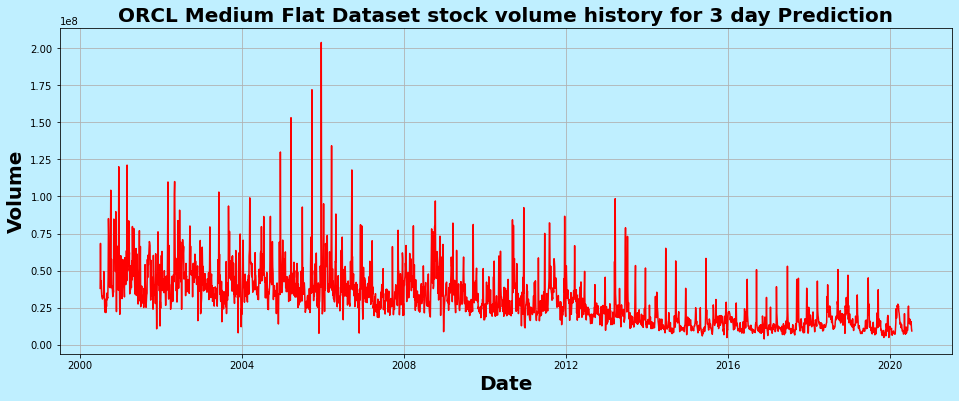

In [ ]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#bfefff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bfefff')
plt.plot(df_2_3d["Volume"], color = 'red')
plt.title('ORCL Medium Flat Dataset stock volume history for 3 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

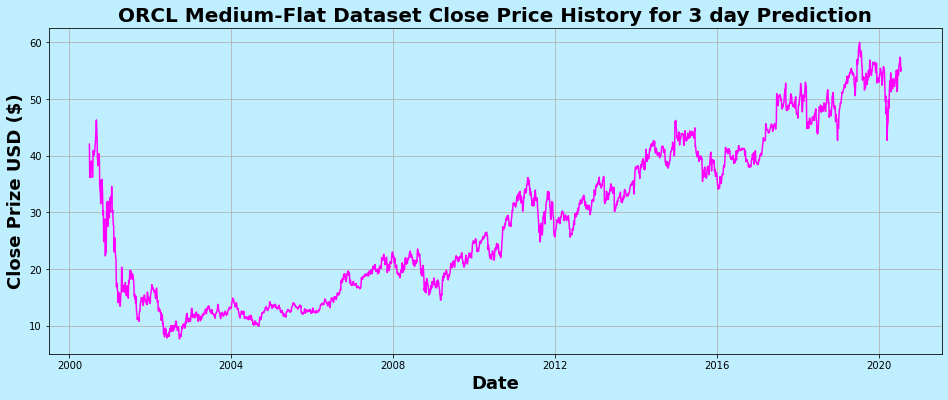

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#bfefff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bfefff')
plt.title('ORCL Medium-Flat Dataset Close Price History for 3 day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_2_3d['Close'], color = 'magenta')
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

In [ ]:
training_2 = df_2_3d[df_2_3d.index < datetime.datetime(year=2016, month=7, day=14)]
training_2

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2000-06-30  40.187500  42.250000  40.000000  42.031250  36.270248  3.809300e+07
2000-07-03  40.562500  40.875000  36.093750  36.156250  31.200495  6.838520e+07
2000-07-06  35.875000  38.500000  35.875000  37.937500  32.737595  4.100660e+07
2000-07-09  37.312500  37.750000  35.562500  36.156250  31.200495  4.303950e+07
2000-07-12  36.718750  38.312500  36.500000  38.062500  32.845470  3.590193e+07
...               ...        ...        ...        ...        ...           ...
2016-06-30  40.480000  41.160000  40.470001  40.860001  38.248913  1.574125e+07
2016-07-03  40.330002  40.580002  40.150002  40.400002  37.818310  1.250140e+07
2016-07-06  40.200001  41.180000  40.020000  40.869999  38.258286  1.267887e+07
2016-07-09  40.900002  41.139999  40.750000  40.779999  38.174030  1.291200e+07
2016-07-12  41.230000  41.869999  41.060001  41.669998  39.007145  1.073117e+07

[1919 rows x 6 columns]

In [ ]:
testing_2 =df_2_3d[df_2_3d.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_2

Open       High        Low      Close  Adj Close        Volume
Date                                                                           
2016-07-15  41.910000  41.910000  41.459999  41.770000  39.100765  1.166630e+07
2016-07-18  41.709999  41.840000  41.009998  41.250000  38.613995  1.095720e+07
2016-07-21  41.340000  41.509998  40.939999  41.080002  38.454861  1.092550e+07
2016-07-24  40.910000  41.240002  40.810001  40.939999  38.323811  1.000315e+07
2016-07-27  41.029999  41.400002  40.720001  41.040001  38.417416  1.328210e+07
...               ...        ...        ...        ...        ...           ...
2020-07-06  56.200001  56.950001  55.990002  56.660000  56.421471  1.370800e+07
2020-07-09  56.990002  57.799999  56.689999  57.389999  57.148399  1.415420e+07
2020-07-12  57.400002  57.840000  56.480000  57.200001  57.200001  1.573795e+07
2020-07-15  57.419998  57.840000  54.759998  54.900002  54.900002  1.123163e+07
2020-07-18  54.880001  55.514999  54.695000  55.450001  55.450001  9.410108e+06

[479 rows x 6 columns]

**Training & Testing Combination**

<function matplotlib.pyplot.show>

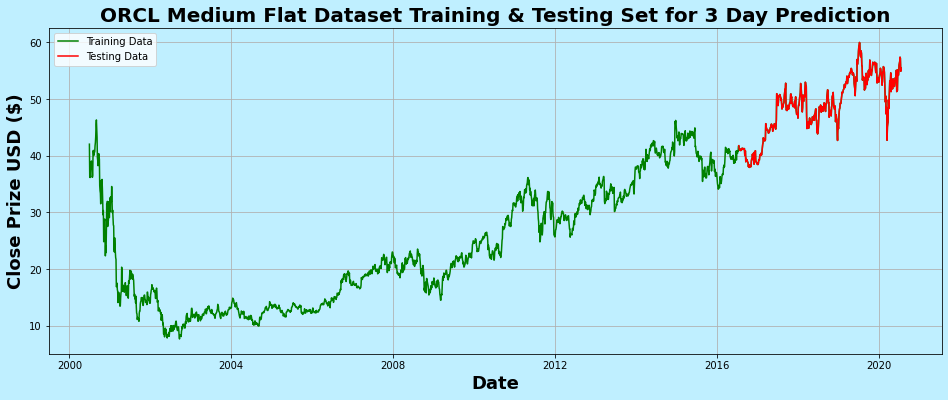

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#bfefff')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bfefff')
training_2, testing_2 = df_2_3d[df_2_3d.index < datetime.datetime(year=2016, month=7, day=14)], df_2_3d[df_2_3d.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('ORCL Medium Flat Dataset Training & Testing Set for 3 Day Prediction', color= 'black',fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18,fontweight = "bold")
plt.plot(df_2_3d['Close'], 'green', label='Training Data')
plt.plot(testing_2['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [ ]:
training_length_2 = training_2.filter(['Close'])
training_length_2

Close
Date                 
2000-06-30  42.031250
2000-07-03  36.156250
2000-07-06  37.937500
2000-07-09  36.156250
2000-07-12  38.062500
...               ...
2016-06-30  40.860001
2016-07-03  40.400002
2016-07-06  40.869999
2016-07-09  40.779999
2016-07-12  41.669998

[1919 rows x 1 columns]

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-15  41.770000
2016-07-18  41.250000
2016-07-21  41.080002
2016-07-24  40.939999
2016-07-27  41.040001
...               ...
2020-07-06  56.660000
2020-07-09  57.389999
2020-07-12  57.200001
2020-07-15  54.900002
2020-07-18  55.450001

[479 rows x 1 columns]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_2 = sc.fit_transform(training_length_2)
training_length_scaled_2

array([[0.88929472],
       [0.73737798],
       [0.78343784],
       ...,
       [0.8592669 ],
       [0.85693966],
       [0.8799534 ]])

In [ ]:
X_train_2 = []
y_train_2 = []
for i in range(30, 1919):
    X_train_2.append(training_length_scaled_2[i-30:i, 0])
    y_train_2.append(training_length_scaled_2[i, 0])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)
print (X_train_2[0])
print ('\n')
print (y_train_2[0])

[0.88929472 0.73737798 0.78343784 0.73737798 0.78667011 0.78667011
 0.81252828 0.77778137 0.79475079 0.73818605 0.74788286 0.85697201
 0.86101235 0.83757838 0.85131553 0.8521236  0.85373974 0.88283018
 0.89656733 0.92404163 0.97818217 1.         0.95636434 0.92161743
 0.82868964 0.81495249 0.79111449 0.82303316 0.84626512 0.83515418]


0.8206089598551942


In [ ]:
X_train_2.shape

(1889, 30)

In [ ]:
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))
X_train_2.shape

(1889, 30, 1)

**Build RNN Model**

In [ ]:
#The RNN Model Build
regressorRNN_2 = Sequential()
regressorRNN_2.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(SimpleRNN(units=128))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_2.summary()

# Fitting to the training set
history_2 = regressorRNN_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, 30, 64)            4224      
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 128)               24704     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 23ms/step - loss: 0.1518 - mae: 0.3066 - mse: 0.1518
Epoch 

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-15  41.770000
2016-07-18  41.250000
2016-07-21  41.080002
2016-07-24  40.939999
2016-07-27  41.040001
...               ...
2020-07-06  56.660000
2020-07-09  57.389999
2020-07-12  57.200001
2020-07-15  54.900002
2020-07-18  55.450001

[479 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[38.41    ],
       [38.419998],
       [37.93    ],
       [38.27    ],
       [38.220001],
       [38.169998],
       [38.029999],
       [38.279999],
       [39.130001],
       [39.450001],
       [39.299999],
       [40.25    ],
       [39.860001],
       [40.099998],
       [40.27    ],
       [40.549999],
       [38.5     ],
       [38.970001],
       [40.349998],
       [40.52    ],
       [40.880001],
       [39.099998],
       [39.      ],
       [38.779999],
       [38.689999],
       [38.450001],
       [38.740002],
       [38.450001],
       [38.66    ],
       [39.259998],
       [39.209999],
       [39.869999],
       [40.150002],
       [40.23    ],
       [40.110001],
       [40.43    ],
       [40.099998],
       [40.23    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [42.27    ],
       [43.169998],
       [42.700001],
       [42.889999],
       [42.689999],
       [42.610001],
       [42.68    ],
       [42.790001],
       [45.66    ],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88253927],
       [0.86909302],
       [0.86469719],
       [0.86107697],
       [0.86366284],
       [0.86650726],
       [0.86004272],
       [0.86599007],
       [0.86495572],
       [0.86495572],
       [0.8709031 ],
       [0.8709031 ],
       [0.86831731],
       [0.86521425],
       [0.86935155],
       [0.86831731],
       [0.86909302],
       [0.86909302],
       [0.83754603],
       [0.85435387],
       [0.85900837],
       [0.80884344],
       [0.82409976],
       [0.81685953],
       [0.81866957],
       [0.81815241],
       [0.81065362],
       [0.80755056],
       [0.80341325],
       [0.78634686],
       [0.79565583],
       [0.79591436],
       [0.78324391],
       [0.79203568],
       [0.7907428 ],
       [0.78944982],
       [0.7858297 ],
       [0.79229424],
       [0.81427373],
       [0.82254835],
       [0.81866957],
       [0.84323486],
       [0.8331502 ],
       [0.83935608],
       [0.84375202],
       [0.85099228],
       [0.79798306],
       [0.810

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(449, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88253927]
  [0.86909302]
  [0.86469719]
  ...
  [0.80755056]
  [0.80341325]
  [0.78634686]]

 [[0.86909302]
  [0.86469719]
  [0.86107697]
  ...
  [0.80341325]
  [0.78634686]
  [0.79565583]]

 [[0.86469719]
  [0.86107697]
  [0.86366284]
  ...
  [0.78634686]
  [0.79565583]
  [0.79591436]]

 ...

 [[1.17758097]
  [1.17706381]
  [1.2148167 ]
  ...
  [1.24894949]
  [1.26756739]
  [1.28644383]]

 [[1.17706381]
  [1.2148167 ]
  [1.12922622]
  ...
  [1.26756739]
  [1.28644383]
  [1.28153083]]

 [[1.2148167 ]
  [1.12922622]
  [1.17318503]
  ...
  [1.28644383]
  [1.28153083]
  [1.22205707]]]


In [ ]:
RNN_2_Stock_Price_Prediction = regressorRNN_2.predict(X_test_2)
RNN_2_Stock_Price_Prediction = sc.inverse_transform(RNN_2_Stock_Price_Prediction)

In [ ]:
print(RNN_2_Stock_Price_Prediction)

[[38.539345]
 [39.006283]
 [38.895718]
 [38.484802]
 [38.74957 ]
 [38.672806]
 [38.594563]
 [38.54389 ]
 [38.797714]
 [39.43235 ]
 [39.929943]
 [39.860653]
 [40.597866]
 [40.41851 ]
 [40.65232 ]
 [40.742077]
 [41.232643]
 [39.325806]
 [39.73387 ]
 [40.71773 ]
 [41.291645]
 [41.232944]
 [39.869328]
 [39.527893]
 [39.22616 ]
 [39.52519 ]
 [39.136555]
 [39.45787 ]
 [38.78031 ]
 [39.13853 ]
 [39.508373]
 [39.628754]
 [40.268814]
 [40.429386]
 [40.640167]
 [40.557865]
 [41.017822]
 [40.611763]
 [40.81641 ]
 [41.110065]
 [41.776398]
 [42.51182 ]
 [42.757626]
 [43.622997]
 [43.238808]
 [43.446404]
 [43.120064]
 [43.370956]
 [43.218655]
 [43.52886 ]
 [45.87475 ]
 [45.58654 ]
 [45.48199 ]
 [44.87224 ]
 [45.167072]
 [44.95737 ]
 [45.41635 ]
 [44.88684 ]
 [44.59733 ]
 [44.371544]
 [44.53339 ]
 [44.854527]
 [45.00723 ]
 [45.332497]
 [45.41428 ]
 [45.783634]
 [45.99879 ]
 [46.007404]
 [45.503815]
 [45.569973]
 [44.82864 ]
 [45.10308 ]
 [45.57585 ]
 [45.885815]
 [45.712585]
 [45.965553]
 [45.896297]

<function matplotlib.pyplot.show>

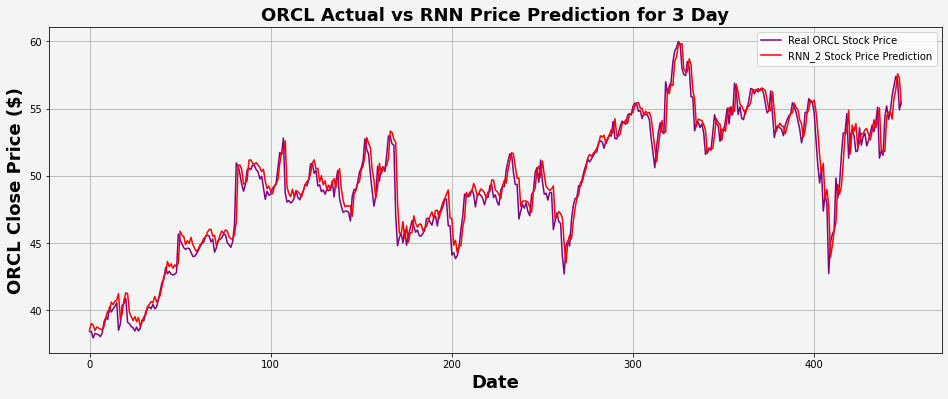

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#f3f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f3f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'purple', label = 'Real ORCL Stock Price')
plt.plot(RNN_2_Stock_Price_Prediction, color = 'red', label = 'RNN_2 Stock Price Prediction')
plt.title('ORCL Actual vs RNN Price Prediction for 3 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, RNN_2_Stock_Price_Prediction))

R Squared = 0.9513672691586604


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.7314454081041636


In [ ]:

def mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction): 
    y_test_2, RNN_2_Stock_Price_Prediction = np.array(y_test_2), np.array(RNN_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - RNN_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.495569436345787


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction))

Mean Squared Error: 1.135509285426584


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.0656027803204082


**Build LSTM Model**

In [ ]:
#The LSTM Model Build
regressorLSTM_2 = Sequential()
regressorLSTM_2.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(LSTM(units=512))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_2.summary()

# Fitting to the training set
history_2 = regressorLSTM_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 1,839,617
Trainable params: 1,839,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 20s 679ms/step - loss: 0.0414 - mae: 0.1308 - mse: 0.041

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-15  41.770000
2016-07-18  41.250000
2016-07-21  41.080002
2016-07-24  40.939999
2016-07-27  41.040001
...               ...
2020-07-06  56.660000
2020-07-09  57.389999
2020-07-12  57.200001
2020-07-15  54.900002
2020-07-18  55.450001

[479 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[38.41    ],
       [38.419998],
       [37.93    ],
       [38.27    ],
       [38.220001],
       [38.169998],
       [38.029999],
       [38.279999],
       [39.130001],
       [39.450001],
       [39.299999],
       [40.25    ],
       [39.860001],
       [40.099998],
       [40.27    ],
       [40.549999],
       [38.5     ],
       [38.970001],
       [40.349998],
       [40.52    ],
       [40.880001],
       [39.099998],
       [39.      ],
       [38.779999],
       [38.689999],
       [38.450001],
       [38.740002],
       [38.450001],
       [38.66    ],
       [39.259998],
       [39.209999],
       [39.869999],
       [40.150002],
       [40.23    ],
       [40.110001],
       [40.43    ],
       [40.099998],
       [40.23    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [42.27    ],
       [43.169998],
       [42.700001],
       [42.889999],
       [42.689999],
       [42.610001],
       [42.68    ],
       [42.790001],
       [45.66    ],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88253927],
       [0.86909302],
       [0.86469719],
       [0.86107697],
       [0.86366284],
       [0.86650726],
       [0.86004272],
       [0.86599007],
       [0.86495572],
       [0.86495572],
       [0.8709031 ],
       [0.8709031 ],
       [0.86831731],
       [0.86521425],
       [0.86935155],
       [0.86831731],
       [0.86909302],
       [0.86909302],
       [0.83754603],
       [0.85435387],
       [0.85900837],
       [0.80884344],
       [0.82409976],
       [0.81685953],
       [0.81866957],
       [0.81815241],
       [0.81065362],
       [0.80755056],
       [0.80341325],
       [0.78634686],
       [0.79565583],
       [0.79591436],
       [0.78324391],
       [0.79203568],
       [0.7907428 ],
       [0.78944982],
       [0.7858297 ],
       [0.79229424],
       [0.81427373],
       [0.82254835],
       [0.81866957],
       [0.84323486],
       [0.8331502 ],
       [0.83935608],
       [0.84375202],
       [0.85099228],
       [0.79798306],
       [0.810

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(449, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88253927]
  [0.86909302]
  [0.86469719]
  ...
  [0.80755056]
  [0.80341325]
  [0.78634686]]

 [[0.86909302]
  [0.86469719]
  [0.86107697]
  ...
  [0.80341325]
  [0.78634686]
  [0.79565583]]

 [[0.86469719]
  [0.86107697]
  [0.86366284]
  ...
  [0.78634686]
  [0.79565583]
  [0.79591436]]

 ...

 [[1.17758097]
  [1.17706381]
  [1.2148167 ]
  ...
  [1.24894949]
  [1.26756739]
  [1.28644383]]

 [[1.17706381]
  [1.2148167 ]
  [1.12922622]
  ...
  [1.26756739]
  [1.28644383]
  [1.28153083]]

 [[1.2148167 ]
  [1.12922622]
  [1.17318503]
  ...
  [1.28644383]
  [1.28153083]
  [1.22205707]]]


In [ ]:
LSTM_2_Stock_Price_Prediction = regressorLSTM_2.predict(X_test_2)
LSTM_2_Stock_Price_Prediction = sc.inverse_transform(LSTM_2_Stock_Price_Prediction)

In [ ]:
print(LSTM_2_Stock_Price_Prediction)

[[38.180378]
 [38.349564]
 [38.38165 ]
 [38.012596]
 [38.19229 ]
 [38.185516]
 [38.142803]
 [38.030067]
 [38.196087]
 [38.862667]
 [39.222633]
 [39.180702]
 [39.905632]
 [39.754074]
 [39.930958]
 [40.106735]
 [40.358074]
 [38.869637]
 [38.96987 ]
 [40.011974]
 [40.286587]
 [40.58891 ]
 [39.308308]
 [39.037975]
 [38.829857]
 [38.710865]
 [38.488247]
 [38.643345]
 [38.43786 ]
 [38.546932]
 [39.012856]
 [39.059048]
 [39.571968]
 [39.887   ]
 [40.021507]
 [39.97965 ]
 [40.237904]
 [40.047653]
 [40.12483 ]
 [40.56215 ]
 [41.09806 ]
 [41.67551 ]
 [41.93424 ]
 [42.684628]
 [42.460697]
 [42.616924]
 [42.51223 ]
 [42.45412 ]
 [42.50269 ]
 [42.586876]
 [44.792522]
 [44.715473]
 [44.557556]
 [44.370438]
 [44.290016]
 [44.365852]
 [44.358284]
 [44.121063]
 [43.862865]
 [43.817318]
 [43.93765 ]
 [44.11987 ]
 [44.357624]
 [44.574898]
 [44.68537 ]
 [45.045124]
 [45.19257 ]
 [45.19986 ]
 [44.88135 ]
 [45.026875]
 [44.28778 ]
 [44.448093]
 [44.87629 ]
 [44.948605]
 [45.05643 ]
 [45.28394 ]
 [45.282738]

<function matplotlib.pyplot.show>

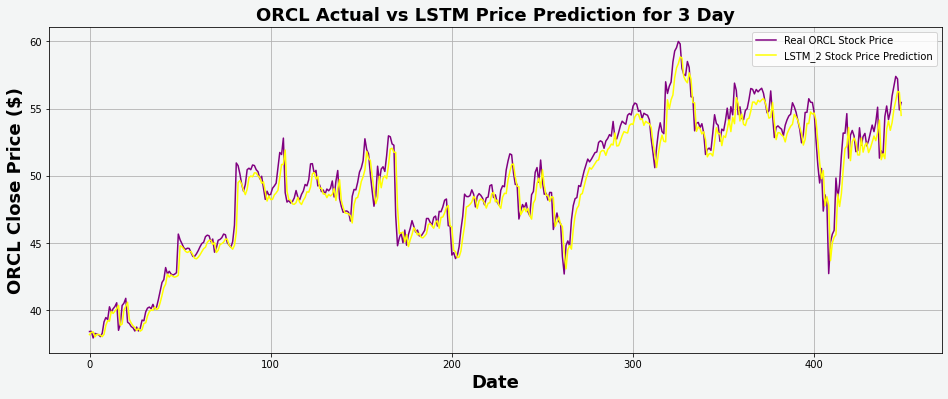

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#f3f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f3f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'purple', label = 'Real ORCL Stock Price')
plt.plot(LSTM_2_Stock_Price_Prediction, color = 'yellow', label = 'LSTM_2 Stock Price Prediction')
plt.title('ORCL Actual vs LSTM Price Prediction for 3 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, LSTM_2_Stock_Price_Prediction))

R Squared = 0.9436904383027458


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Error: 1.7267413660331334


In [ ]:
def mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction): 
    y_test_2, LSTM_2_Stock_Price_Prediction = np.array(y_test_2), np.array(LSTM_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - LSTM_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 3.4511597586316856


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction))

Mean Squared Error: 3.756169338877174


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.9380839349412022


**Build GRU Model**

In [ ]:
#The GRU Model Build
regressorGRU_2 = Sequential()
regressorGRU_2.add(GRU(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(GRU(units=512))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(Dense(units=1))
# Compiling the LSTM
regressorGRU_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_2.summary()

# Fitting to the training set
history_2 = regressorGRU_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 30, 256)           198912    
_________________________________________________________________
dropout_34 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
gru_13 (GRU)                 (None, 512)               1182720   
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 1,382,145
Trainable params: 1,382,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 15s 487ms/step - loss: 0.0156 - mae: 0.0770 - mse: 0.015

In [ ]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-15  41.770000
2016-07-18  41.250000
2016-07-21  41.080002
2016-07-24  40.939999
2016-07-27  41.040001
...               ...
2020-07-06  56.660000
2020-07-09  57.389999
2020-07-12  57.200001
2020-07-15  54.900002
2020-07-18  55.450001

[479 rows x 1 columns]

In [ ]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[38.41    ],
       [38.419998],
       [37.93    ],
       [38.27    ],
       [38.220001],
       [38.169998],
       [38.029999],
       [38.279999],
       [39.130001],
       [39.450001],
       [39.299999],
       [40.25    ],
       [39.860001],
       [40.099998],
       [40.27    ],
       [40.549999],
       [38.5     ],
       [38.970001],
       [40.349998],
       [40.52    ],
       [40.880001],
       [39.099998],
       [39.      ],
       [38.779999],
       [38.689999],
       [38.450001],
       [38.740002],
       [38.450001],
       [38.66    ],
       [39.259998],
       [39.209999],
       [39.869999],
       [40.150002],
       [40.23    ],
       [40.110001],
       [40.43    ],
       [40.099998],
       [40.23    ],
       [40.790001],
       [41.41    ],
       [42.060001],
       [42.27    ],
       [43.169998],
       [42.700001],
       [42.889999],
       [42.689999],
       [42.610001],
       [42.68    ],
       [42.790001],
       [45.66    ],


In [ ]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88253927],
       [0.86909302],
       [0.86469719],
       [0.86107697],
       [0.86366284],
       [0.86650726],
       [0.86004272],
       [0.86599007],
       [0.86495572],
       [0.86495572],
       [0.8709031 ],
       [0.8709031 ],
       [0.86831731],
       [0.86521425],
       [0.86935155],
       [0.86831731],
       [0.86909302],
       [0.86909302],
       [0.83754603],
       [0.85435387],
       [0.85900837],
       [0.80884344],
       [0.82409976],
       [0.81685953],
       [0.81866957],
       [0.81815241],
       [0.81065362],
       [0.80755056],
       [0.80341325],
       [0.78634686],
       [0.79565583],
       [0.79591436],
       [0.78324391],
       [0.79203568],
       [0.7907428 ],
       [0.78944982],
       [0.7858297 ],
       [0.79229424],
       [0.81427373],
       [0.82254835],
       [0.81866957],
       [0.84323486],
       [0.8331502 ],
       [0.83935608],
       [0.84375202],
       [0.85099228],
       [0.79798306],
       [0.810

In [ ]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(449, 30)

In [ ]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88253927]
  [0.86909302]
  [0.86469719]
  ...
  [0.80755056]
  [0.80341325]
  [0.78634686]]

 [[0.86909302]
  [0.86469719]
  [0.86107697]
  ...
  [0.80341325]
  [0.78634686]
  [0.79565583]]

 [[0.86469719]
  [0.86107697]
  [0.86366284]
  ...
  [0.78634686]
  [0.79565583]
  [0.79591436]]

 ...

 [[1.17758097]
  [1.17706381]
  [1.2148167 ]
  ...
  [1.24894949]
  [1.26756739]
  [1.28644383]]

 [[1.17706381]
  [1.2148167 ]
  [1.12922622]
  ...
  [1.26756739]
  [1.28644383]
  [1.28153083]]

 [[1.2148167 ]
  [1.12922622]
  [1.17318503]
  ...
  [1.28644383]
  [1.28153083]
  [1.22205707]]]


In [ ]:
GRU_2_Stock_Price_Prediction = regressorGRU_2.predict(X_test_2)
GRU_2_Stock_Price_Prediction = sc.inverse_transform(GRU_2_Stock_Price_Prediction)

In [ ]:
print(GRU_2_Stock_Price_Prediction)

[[37.959473]
 [38.25021 ]
 [38.199574]
 [37.789997]
 [38.07755 ]
 [37.997288]
 [37.973946]
 [37.84712 ]
 [38.06262 ]
 [38.785233]
 [39.076733]
 [39.018208]
 [39.87858 ]
 [39.553123]
 [39.849285]
 [39.981922]
 [40.253895]
 [38.519516]
 [38.951855]
 [39.97621 ]
 [40.12543 ]
 [40.51732 ]
 [39.03079 ]
 [38.998505]
 [38.6802  ]
 [38.575306]
 [38.31905 ]
 [38.544342]
 [38.26107 ]
 [38.455063]
 [38.946243]
 [38.917362]
 [39.53302 ]
 [39.780888]
 [39.915466]
 [39.852802]
 [40.15414 ]
 [39.875065]
 [40.018448]
 [40.474445]
 [41.01142 ]
 [41.605312]
 [41.844383]
 [42.681503]
 [42.330276]
 [42.59794 ]
 [42.41929 ]
 [42.386497]
 [42.431458]
 [42.5173  ]
 [44.91893 ]
 [44.54439 ]
 [44.583187]
 [44.357967]
 [44.284515]
 [44.34333 ]
 [44.313454]
 [44.06397 ]
 [43.817425]
 [43.787624]
 [43.909443]
 [44.092754]
 [44.33871 ]
 [44.556965]
 [44.663837]
 [45.04609 ]
 [45.158268]
 [45.16893 ]
 [44.825035]
 [45.012833]
 [44.16605 ]
 [44.44771 ]
 [44.821766]
 [44.87691 ]
 [45.019936]
 [45.25797 ]
 [45.239464]

<function matplotlib.pyplot.show>

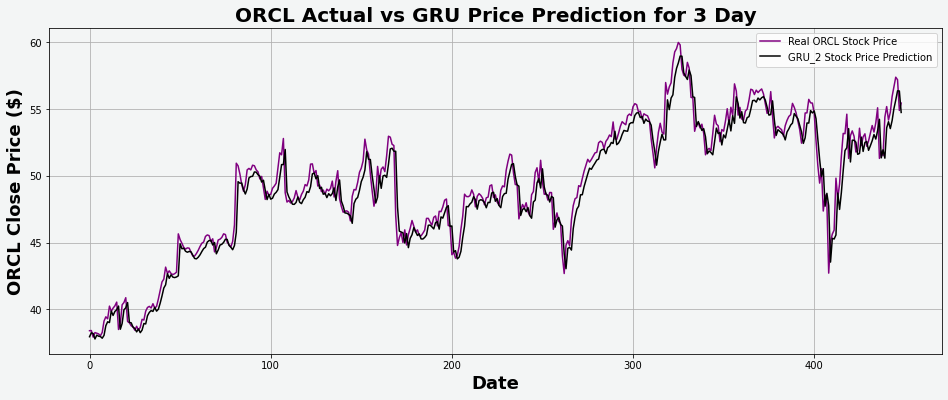

In [ ]:
plt.figure(figsize = (16,6), facecolor ='#f3f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f3f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'purple', label = 'Real ORCL Stock Price')
plt.plot(GRU_2_Stock_Price_Prediction, color = 'black', label = 'GRU_2 Stock Price Prediction')
plt.title('ORCL Actual vs GRU Price Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_2, GRU_2_Stock_Price_Prediction))

R Squared = 0.9448607679935995


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.83837082108244


In [ ]:
def mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction): 
    y_test_2, GRU_2_Stock_Price_Prediction = np.array(y_test_2), np.array(GRU_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - GRU_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.6850452666949627


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction))

Mean Squared Error: 1.287427394090252


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction)))

Root Mean Squared Error: 1.1346485773534694


# **Fluctuate Dataset 3 Day Stock Price Prediction**

**Dataset Details : Intuit Inc. (INTU)**

In [2]:
df3 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/INTU.csv', parse_dates=True, index_col=0)
df3.head()

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2000-06-30  21.00000  21.00000  19.96875  20.68750  18.821939  5701200
2000-07-03  20.53125  20.62500  20.12500  20.15625  18.338593   871000
2000-07-05  20.31250  22.46875  20.00000  22.03125  20.044516  7936600
2000-07-06  22.00000  22.43750  21.06250  22.37500  20.357264  4842000
2000-07-07  22.43750  22.75000  22.06250  22.21875  20.215105  3339600

In [3]:
agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df_3_3d = df3.resample('3D').agg(agg_dict)

In [4]:
print(df_3_3d.head(10))
print('---------')
print(df_3_3d.tail(10))

                 Open      High       Low     Close  Adj Close        Volume
Date                                                                        
2000-06-30  21.000000  21.00000  19.96875  20.68750  18.821939  5.701200e+06
2000-07-03  20.531250  22.46875  20.00000  22.03125  20.044516  4.403800e+06
2000-07-06  22.000000  22.75000  21.06250  22.21875  20.215105  4.090800e+06
2000-07-09  22.031250  23.09375  21.62500  21.87500  19.902359  4.746600e+06
2000-07-12  22.125000  22.50000  20.56250  21.12500  19.219984  4.615933e+06
2000-07-15  21.031250  21.06250  20.18750  20.53125  18.679779  3.376600e+06
2000-07-18  20.250000  20.81250  19.40625  19.43750  17.684658  4.312600e+06
2000-07-21  19.484375  19.75000  18.93750  18.93750  17.229748  3.253800e+06
2000-07-24  19.093750  19.46875  16.87500  17.71875  16.120907  4.163800e+06
2000-07-27  17.437500  18.09375  16.50000  16.56250  15.068923  2.774000e+06
---------
                  Open        High  ...   Adj Close        Volume


In [5]:
df_3_3d.shape

(2442, 6)

In [6]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df_3_3d.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df_3_3d.apply(num_missing, axis=1).head())

Missing values per column:
Open         44
High         44
Low          44
Close        44
Adj Close    44
Volume       44
dtype: int64

Missing values per row:
Date
2000-06-30    0
2000-07-03    0
2000-07-06    0
2000-07-09    0
2000-07-12    0
Freq: 3D, dtype: int64


In [7]:
df_3_3d[['Open','High','Low','Close']] = df_3_3d[['Open','High','Low','Close']].replace(0, nan)
# print the first 10 rows of data
print(df_3_3d.head(10))

df_3_3d.dropna(inplace=True)

                 Open      High       Low     Close  Adj Close        Volume
Date                                                                        
2000-06-30  21.000000  21.00000  19.96875  20.68750  18.821939  5.701200e+06
2000-07-03  20.531250  22.46875  20.00000  22.03125  20.044516  4.403800e+06
2000-07-06  22.000000  22.75000  21.06250  22.21875  20.215105  4.090800e+06
2000-07-09  22.031250  23.09375  21.62500  21.87500  19.902359  4.746600e+06
2000-07-12  22.125000  22.50000  20.56250  21.12500  19.219984  4.615933e+06
2000-07-15  21.031250  21.06250  20.18750  20.53125  18.679779  3.376600e+06
2000-07-18  20.250000  20.81250  19.40625  19.43750  17.684658  4.312600e+06
2000-07-21  19.484375  19.75000  18.93750  18.93750  17.229748  3.253800e+06
2000-07-24  19.093750  19.46875  16.87500  17.71875  16.120907  4.163800e+06
2000-07-27  17.437500  18.09375  16.50000  16.56250  15.068923  2.774000e+06


In [8]:
# summarize the shape of the data with missing rows removed
df_3_3d.shape

(2398, 6)

In [9]:
df_3_3d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2398 entries, 2000-06-30 to 2020-07-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2398 non-null   float64
 1   High       2398 non-null   float64
 2   Low        2398 non-null   float64
 3   Close      2398 non-null   float64
 4   Adj Close  2398 non-null   float64
 5   Volume     2398 non-null   float64
dtypes: float64(6)
memory usage: 131.1 KB


In [10]:
df_3_3d.describe()

Open         High  ...    Adj Close        Volume
count  2398.000000  2398.000000  ...  2398.000000  2.398000e+03
mean     73.089796    74.337906  ...    70.187236  3.333573e+06
std      71.366805    72.522412  ...    71.486770  2.831691e+06
min      13.156250    14.000000  ...    11.315909  3.272000e+05
25%      24.402500    24.927500  ...    22.199661  1.587288e+06
50%      36.830000    37.680000  ...    33.558777  2.645933e+06
75%      96.799999    98.052498  ...    92.234027  4.214867e+06
max     309.720001   314.730011  ...   309.850006  5.820370e+07

[8 rows x 6 columns]

**Open, High, Low, Close Price History**

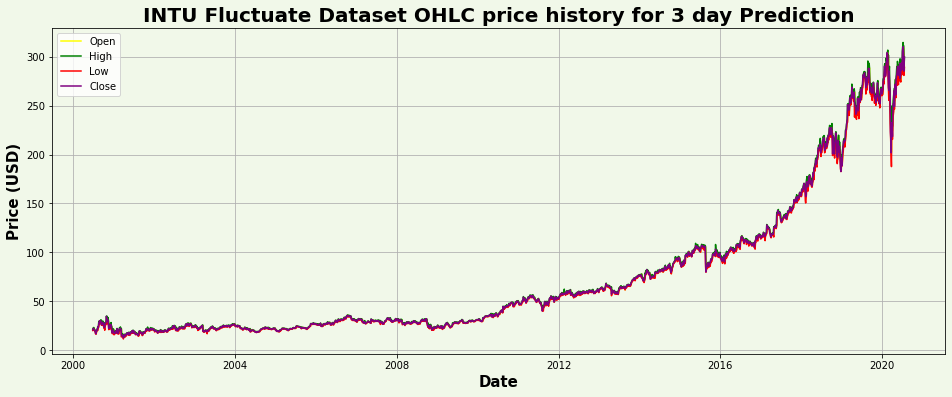

In [11]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#f1f8e9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f1f8e9')
plt.plot(df_3_3d["Open"], color = 'yellow')
plt.plot(df_3_3d["High"], color = 'green')
plt.plot(df_3_3d["Low"], color = 'red')
plt.plot(df_3_3d["Close"],color = 'purple')
plt.title('INTU Fluctuate Dataset OHLC price history for 3 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

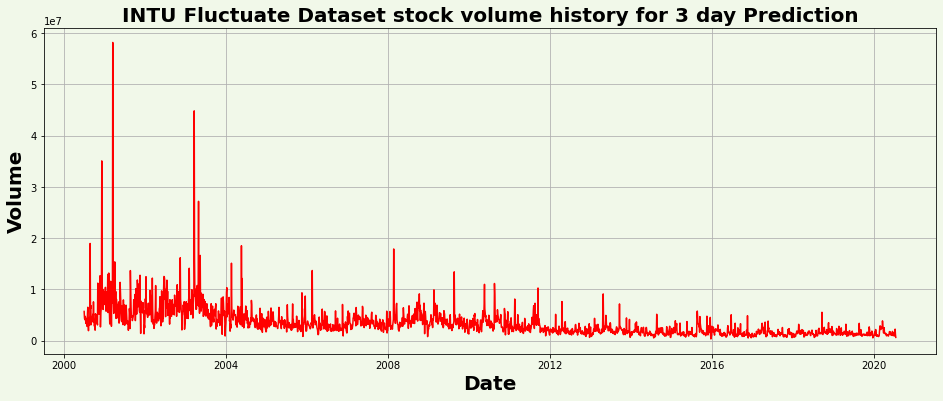

In [12]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#f1f8e9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f1f8e9')
plt.plot(df_3_3d["Volume"], color = 'red')
plt.title('INTU Fluctuate Dataset stock volume history for 3 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Close Price History**

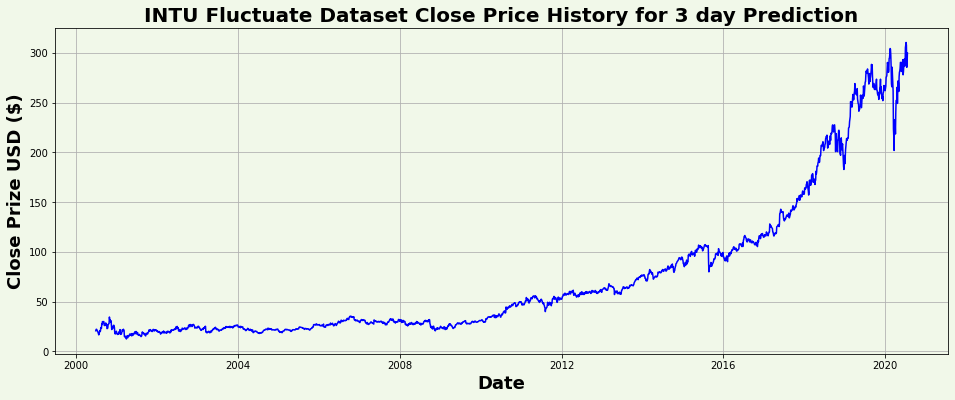

In [13]:

plt.figure(figsize = (16,6), facecolor = '#f1f8e9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f1f8e9')
plt.title('INTU Fluctuate Dataset Close Price History for 3 day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df_3_3d['Close'], color = 'blue')
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [14]:
training_3 = df_3_3d[df_3_3d.index < datetime.datetime(year=2016, month=7, day=14)]
training_3

Open        High  ...   Adj Close        Volume
Date                                ...                          
2000-06-30   21.000000   21.000000  ...   18.821939  5.701200e+06
2000-07-03   20.531250   22.468750  ...   20.044516  4.403800e+06
2000-07-06   22.000000   22.750000  ...   20.215105  4.090800e+06
2000-07-09   22.031250   23.093750  ...   19.902359  4.746600e+06
2000-07-12   22.125000   22.500000  ...   19.219984  4.615933e+06
...                ...         ...  ...         ...           ...
2016-06-30  109.370003  112.480003  ...  107.590889  1.604500e+06
2016-07-03  111.510002  113.019997  ...  108.388840  1.578200e+06
2016-07-06  112.040001  116.029999  ...  111.315399  1.303467e+06
2016-07-09  116.050003  116.400002  ...  111.459961  1.535900e+06
2016-07-12  116.449997  116.970001  ...  112.192574  1.015933e+06

[1919 rows x 6 columns]

In [15]:
testing_3 =df_3_3d[df_3_3d.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_3

Open        High  ...   Adj Close        Volume
Date                                ...                          
2016-07-15  116.580002  116.580002  ...  110.833405  2.158400e+06
2016-07-18  114.889999  115.750000  ...  110.650269  1.052700e+06
2016-07-21  114.480003  114.489998  ...  109.946587  8.395000e+05
2016-07-24  113.970001  114.620003  ...  109.522461  6.743500e+05
2016-07-27  113.589996  113.589996  ...  106.987312  2.392433e+06
...                ...         ...  ...         ...           ...
2020-07-06  308.000000  314.730011  ...  309.850006  1.023133e+06
2020-07-09  309.720001  311.000000  ...  307.549988  8.949500e+05
2020-07-12  309.000000  311.230011  ...  285.369995  2.244600e+06
2020-07-15  288.029999  290.880005  ...  289.269989  1.183633e+06
2020-07-18  289.500000  299.709991  ...  299.700012  6.354670e+05

[479 rows x 6 columns]

**INTU Training & Testing History**

<function matplotlib.pyplot.show>

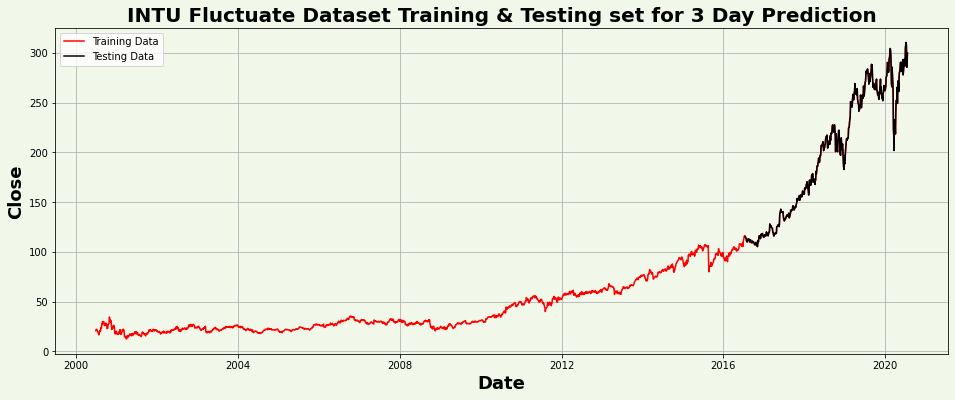

In [16]:
plt.figure(figsize = (16,6), facecolor = '#f1f8e9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f1f8e9')
training_3, testing_3 = df_3_3d[df_3_3d.index < datetime.datetime(year=2016, month=7, day=14)], df_3_3d[df_3_3d.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('INTU Fluctuate Dataset Training & Testing set for 3 Day Prediction', fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot(df_3_3d['Close'], 'red', label='Training Data')
plt.plot(testing_3['Close'], 'black', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [17]:
training_length_3 = training_3.filter(['Close'])
training_length_3

Close
Date                  
2000-06-30   20.687500
2000-07-03   22.031250
2000-07-06   22.218750
2000-07-09   21.875000
2000-07-12   21.125000
...                ...
2016-06-30  111.910004
2016-07-03  112.739998
2016-07-06  115.480003
2016-07-09  115.629997
2016-07-12  116.389999

[1919 rows x 1 columns]

In [18]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-15  114.980003
2016-07-18  114.790001
2016-07-21  114.059998
2016-07-24  113.620003
2016-07-27  110.989998
...                ...
2020-07-06  310.380005
2020-07-09  307.549988
2020-07-12  285.369995
2020-07-15  289.269989
2020-07-18  299.700012

[479 rows x 1 columns]

In [19]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_3 = sc.fit_transform(training_length_3)
training_length_scaled_3

array([[0.07936317],
       [0.09228975],
       [0.09409346],
       ...,
       [0.99124604],
       [0.99268895],
       [1.        ]])

In [20]:
X_train_3 = []
y_train_3 = []
for i in range(30, 1919):
    X_train_3.append(training_length_scaled_3[i-30:i, 0])
    y_train_3.append(training_length_scaled_3[i, 0])
X_train_3, y_train_3 = np.array(X_train_3), np.array(y_train_3)
print (X_train_3[0])
print ('\n')
print (y_train_3[0])

[0.07936317 0.09228975 0.09409346 0.09078666 0.08357182 0.07786008
 0.06733845 0.06252856 0.05080445 0.03968159 0.04870013 0.06793968
 0.07996441 0.0715471  0.07695823 0.10942498 0.10611818 0.10190953
 0.14459729 0.13948679 0.16834612 0.16383685 0.15692263 0.16774489
 0.16864674 0.15121089 0.12956639 0.14730286 0.13287319 0.14850533]


0.15451768985370906


In [21]:
X_train_3.shape

(1889, 30)

In [22]:
X_train_3 = np.reshape(X_train_3, (X_train_3.shape[0], X_train_3.shape[1], 1))
X_train_3.shape

(1889, 30, 1)

**Build RNN Model**

In [ ]:
#The RNN Model Build
regressorRNN_3 = Sequential()
regressorRNN_3.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(SimpleRNN(units=128))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_3.summary()

# Fitting to the training set
history_3 = regressorRNN_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 30, 128)           16640     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dropout_39 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 49,665
Trainable params: 49,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 1s 32ms/step - loss: 0.1132 - mae: 0.2400 - mse: 0.1132
Epoch 

In [ ]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-15  114.980003
2016-07-18  114.790001
2016-07-21  114.059998
2016-07-24  113.620003
2016-07-27  110.989998
...                ...
2020-07-06  310.380005
2020-07-09  307.549988
2020-07-12  285.369995
2020-07-15  289.269989
2020-07-18  299.700012

[479 rows x 1 columns]

In [ ]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[106.989998],
       [107.150002],
       [108.449997],
       [109.629997],
       [107.309998],
       [108.169998],
       [106.199997],
       [105.279999],
       [108.349998],
       [111.379997],
       [110.010002],
       [113.800003],
       [115.980003],
       [115.82    ],
       [116.07    ],
       [116.160004],
       [113.260002],
       [114.889999],
       [117.669998],
       [116.980003],
       [117.669998],
       [117.309998],
       [118.389999],
       [116.919998],
       [114.919998],
       [114.610001],
       [114.980003],
       [116.860001],
       [116.110001],
       [117.099998],
       [115.949997],
       [117.099998],
       [120.010002],
       [118.589996],
       [118.580002],
       [118.370003],
       [117.889999],
       [116.089996],
       [117.529999],
       [118.949997],
       [119.860001],
       [119.870003],
       [128.009995],
       [125.849998],
       [125.169998],
       [126.449997],
       [125.599998],
       [124.9

In [ ]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.98643615],
       [0.98460837],
       [0.97758591],
       [0.97335325],
       [0.94805319],
       [0.94584068],
       [0.93756767],
       [0.95286308],
       [0.9660422 ],
       [0.95863492],
       [0.96229049],
       [0.96546503],
       [0.96296387],
       [0.93852963],
       [0.94160795],
       [0.95247828],
       [0.95844257],
       [0.95170875],
       [0.93131479],
       [0.93410454],
       [0.9362209 ],
       [0.92890985],
       [0.94603304],
       [0.93756767],
       [0.93958781],
       [0.93862584],
       [0.93044905],
       [0.92737064],
       [0.91399916],
       [0.91476876],
       [0.90957407],
       [0.91111328],
       [0.92361894],
       [0.93497028],
       [0.9126524 ],
       [0.92092541],
       [0.90197444],
       [0.89312426],
       [0.92265697],
       [0.95180489],
       [0.93862584],
       [0.97508481],
       [0.99605593],
       [0.99451674],
       [0.99692168],
       [0.9977875 ],
       [0.96989012],
       [0.985

In [ ]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(449, 30)

In [ ]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.98643615]
  [0.98460837]
  [0.97758591]
  ...
  [0.92737064]
  [0.91399916]
  [0.91476876]]

 [[0.98460837]
  [0.97758591]
  [0.97335325]
  ...
  [0.91399916]
  [0.91476876]
  [0.90957407]]

 [[0.97758591]
  [0.97335325]
  [0.94805319]
  ...
  [0.91476876]
  [0.90957407]
  [0.91111328]]

 ...

 [[2.30550019]
  [2.30415343]
  [2.43305825]
  ...
  [2.81727222]
  [2.86614086]
  [2.83891672]]

 [[2.30415343]
  [2.43305825]
  [2.27712173]
  ...
  [2.86614086]
  [2.83891672]
  [2.62555011]]

 [[2.43305825]
  [2.27712173]
  [2.41670481]
  ...
  [2.83891672]
  [2.62555011]
  [2.66306719]]]


In [ ]:
RNN_3_Stock_Price_Prediction = regressorRNN_3.predict(X_test_3)
RNN_3_Stock_Price_Prediction = sc.inverse_transform(RNN_3_Stock_Price_Prediction)

In [ ]:
print(RNN_3_Stock_Price_Prediction)

[[108.084984]
 [107.51126 ]
 [107.60294 ]
 [108.94155 ]
 [109.64533 ]
 [107.776344]
 [108.41217 ]
 [106.62281 ]
 [105.956894]
 [108.40544 ]
 [111.36311 ]
 [110.31742 ]
 [113.61509 ]
 [115.651054]
 [115.81501 ]
 [115.76371 ]
 [116.26217 ]
 [114.150764]
 [114.74678 ]
 [117.2645  ]
 [117.28779 ]
 [117.36165 ]
 [117.170204]
 [118.16186 ]
 [116.4888  ]
 [114.75871 ]
 [114.94539 ]
 [115.069954]
 [116.12675 ]
 [115.89648 ]
 [117.16048 ]
 [115.67668 ]
 [116.70018 ]
 [119.471985]
 [118.06572 ]
 [118.26217 ]
 [118.61593 ]
 [117.617256]
 [115.870186]
 [117.58785 ]
 [118.58578 ]
 [119.294   ]
 [119.431274]
 [126.87414 ]
 [124.89471 ]
 [124.83349 ]
 [125.726006]
 [125.33525 ]
 [124.44149 ]
 [123.83115 ]
 [124.32761 ]
 [123.363525]
 [119.84687 ]
 [119.82351 ]
 [117.92157 ]
 [115.62912 ]
 [115.77092 ]
 [118.0632  ]
 [117.79184 ]
 [117.643654]
 [118.88014 ]
 [118.22892 ]
 [118.59963 ]
 [124.446175]
 [124.97849 ]
 [125.45125 ]
 [125.878975]
 [127.09181 ]
 [125.753654]
 [126.67172 ]
 [125.5934  ]
 [126.

<function matplotlib.pyplot.show>

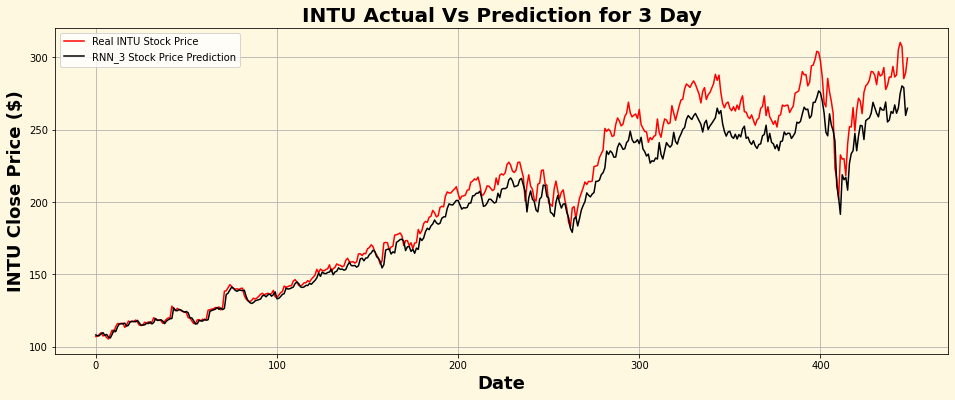

In [ ]:
plt.figure(figsize = (16,6), facecolor = '#fff8e1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff8e1')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real INTU Stock Price')
plt.plot(RNN_3_Stock_Price_Prediction, color = 'black', label = 'RNN_3 Stock Price Prediction')
plt.title('INTU Actual Vs Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [ ]:
print ('R Squared =',r2_score(y_test_3, RNN_3_Stock_Price_Prediction))

R Squared = 0.9428077539634064


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Error: 10.65475182364782


In [ ]:
def mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction): 
    y_test_3, RNN_3_Stock_Price_Prediction = np.array(y_test_3), np.array(RNN_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - RNN_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 4.465360620948849


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction))

Mean Squared Error: 202.00655348529617


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction)))

Root Mean Squared Error: 14.212900952490177


**Build LSTM Model**

In [45]:
#The LSTM Model Build
regressorLSTM_3 = Sequential()
regressorLSTM_3.add(LSTM(units=1024, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(LSTM(units=512))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_3.summary()

# Fitting to the training set
history_3 = regressorLSTM_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 1024)          4202496   
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 1024)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 512)               3147776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 7,350,785
Trainable params: 7,350,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 2s 74ms/step - loss: 0.0180 - mae: 0.0799 - mse: 0.0180
E

In [46]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-15  114.980003
2016-07-18  114.790001
2016-07-21  114.059998
2016-07-24  113.620003
2016-07-27  110.989998
...                ...
2020-07-06  310.380005
2020-07-09  307.549988
2020-07-12  285.369995
2020-07-15  289.269989
2020-07-18  299.700012

[479 rows x 1 columns]

In [47]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[106.989998],
       [107.150002],
       [108.449997],
       [109.629997],
       [107.309998],
       [108.169998],
       [106.199997],
       [105.279999],
       [108.349998],
       [111.379997],
       [110.010002],
       [113.800003],
       [115.980003],
       [115.82    ],
       [116.07    ],
       [116.160004],
       [113.260002],
       [114.889999],
       [117.669998],
       [116.980003],
       [117.669998],
       [117.309998],
       [118.389999],
       [116.919998],
       [114.919998],
       [114.610001],
       [114.980003],
       [116.860001],
       [116.110001],
       [117.099998],
       [115.949997],
       [117.099998],
       [120.010002],
       [118.589996],
       [118.580002],
       [118.370003],
       [117.889999],
       [116.089996],
       [117.529999],
       [118.949997],
       [119.860001],
       [119.870003],
       [128.009995],
       [125.849998],
       [125.169998],
       [126.449997],
       [125.599998],
       [124.9

In [48]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.98643615],
       [0.98460837],
       [0.97758591],
       [0.97335325],
       [0.94805319],
       [0.94584068],
       [0.93756767],
       [0.95286308],
       [0.9660422 ],
       [0.95863492],
       [0.96229049],
       [0.96546503],
       [0.96296387],
       [0.93852963],
       [0.94160795],
       [0.95247828],
       [0.95844257],
       [0.95170875],
       [0.93131479],
       [0.93410454],
       [0.9362209 ],
       [0.92890985],
       [0.94603304],
       [0.93756767],
       [0.93958781],
       [0.93862584],
       [0.93044905],
       [0.92737064],
       [0.91399916],
       [0.91476876],
       [0.90957407],
       [0.91111328],
       [0.92361894],
       [0.93497028],
       [0.9126524 ],
       [0.92092541],
       [0.90197444],
       [0.89312426],
       [0.92265697],
       [0.95180489],
       [0.93862584],
       [0.97508481],
       [0.99605593],
       [0.99451674],
       [0.99692168],
       [0.9977875 ],
       [0.96989012],
       [0.985

In [49]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(449, 30)

In [50]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.98643615]
  [0.98460837]
  [0.97758591]
  ...
  [0.92737064]
  [0.91399916]
  [0.91476876]]

 [[0.98460837]
  [0.97758591]
  [0.97335325]
  ...
  [0.91399916]
  [0.91476876]
  [0.90957407]]

 [[0.97758591]
  [0.97335325]
  [0.94805319]
  ...
  [0.91476876]
  [0.90957407]
  [0.91111328]]

 ...

 [[2.30550019]
  [2.30415343]
  [2.43305825]
  ...
  [2.81727222]
  [2.86614086]
  [2.83891672]]

 [[2.30415343]
  [2.43305825]
  [2.27712173]
  ...
  [2.86614086]
  [2.83891672]
  [2.62555011]]

 [[2.43305825]
  [2.27712173]
  [2.41670481]
  ...
  [2.83891672]
  [2.62555011]
  [2.66306719]]]


In [51]:
LSTM_3_Stock_Price_Prediction = regressorLSTM_3.predict(X_test_3)
LSTM_3_Stock_Price_Prediction = sc.inverse_transform(LSTM_3_Stock_Price_Prediction)

In [52]:
print(LSTM_3_Stock_Price_Prediction)

[[109.839096]
 [109.375175]
 [109.37491 ]
 [110.310036]
 [111.3596  ]
 [109.86955 ]
 [110.20885 ]
 [108.82188 ]
 [107.856384]
 [109.8972  ]
 [112.53291 ]
 [112.06445 ]
 [114.8     ]
 [116.97867 ]
 [117.36983 ]
 [117.71194 ]
 [117.910446]
 [115.882195]
 [116.70836 ]
 [118.8994  ]
 [118.83222 ]
 [119.36409 ]
 [119.2292  ]
 [120.03514 ]
 [119.139145]
 [117.533485]
 [116.985115]
 [117.12139 ]
 [118.49969 ]
 [118.19898 ]
 [118.87699 ]
 [118.16974 ]
 [118.89682 ]
 [121.16888 ]
 [120.58421 ]
 [120.51706 ]
 [120.36738 ]
 [120.01087 ]
 [118.63328 ]
 [119.41116 ]
 [120.57193 ]
 [121.460495]
 [121.654274]
 [127.68048 ]
 [127.231255]
 [126.83529 ]
 [127.764084]
 [127.38489 ]
 [126.89957 ]
 [126.370636]
 [125.99349 ]
 [125.53565 ]
 [122.956184]
 [122.24407 ]
 [120.69428 ]
 [118.959435]
 [118.56854 ]
 [120.18929 ]
 [120.55991 ]
 [120.08722 ]
 [120.780914]
 [120.4657  ]
 [120.9458  ]
 [125.51997 ]
 [126.60109 ]
 [127.228264]
 [127.56442 ]
 [128.40512 ]
 [128.20287 ]
 [128.94672 ]
 [127.5721  ]
 [128.

<function matplotlib.pyplot.show>

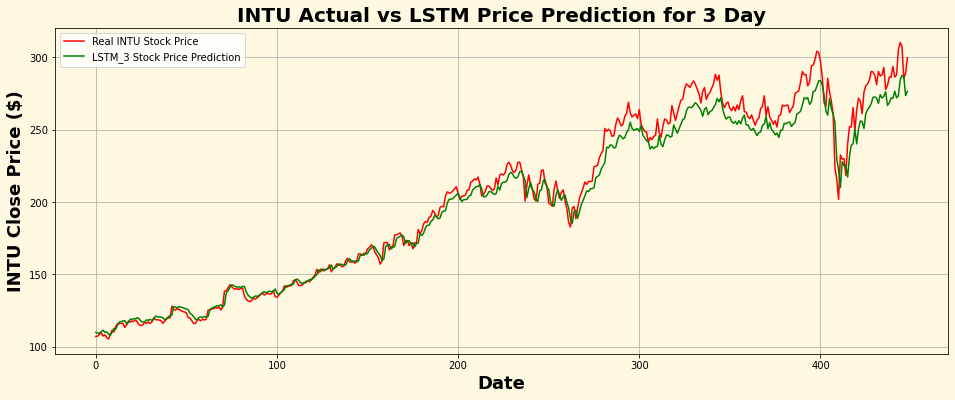

In [53]:
plt.figure(figsize = (16,6), facecolor ='#fff8e1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff8e1')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real INTU Stock Price')
plt.plot(LSTM_3_Stock_Price_Prediction, color = 'green', label = 'LSTM_3 Stock Price Prediction')
plt.title('INTU Actual vs LSTM Price Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [59]:
print ('R Squared =',r2_score(y_test_3, LSTM_3_Stock_Price_Prediction))

R Squared = 0.9745304758023489


In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Error: 6.852879561346177


In [61]:
def mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction): 
    y_test_3, LSTM_3_Stock_Price_Prediction = np.array(y_test_3), np.array(LSTM_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - LSTM_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 2.971336596696773


In [62]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction))

Mean Squared Error: 89.95993615613388


In [63]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction)))

Root Mean Squared Error: 9.484721195487714


**Build GRU Model**

In [64]:
#The GRU Model Build
regressorGRU_3 = Sequential()
regressorGRU_3.add(GRU(units=1024, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(GRU(units=512))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(Dense(units=1))
# Compiling the GRU
regressorGRU_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_3.summary()

# Fitting to the training set
history_3 = regressorGRU_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 1024)          3154944   
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 1024)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               2362368   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 5,517,825
Trainable params: 5,517,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
30/30 [==============================] - 2s 61ms/step - loss: 0.0094 - mae: 0.0452 - mse: 0.0094
E

In [65]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-15  114.980003
2016-07-18  114.790001
2016-07-21  114.059998
2016-07-24  113.620003
2016-07-27  110.989998
...                ...
2020-07-06  310.380005
2020-07-09  307.549988
2020-07-12  285.369995
2020-07-15  289.269989
2020-07-18  299.700012

[479 rows x 1 columns]

In [66]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[106.989998],
       [107.150002],
       [108.449997],
       [109.629997],
       [107.309998],
       [108.169998],
       [106.199997],
       [105.279999],
       [108.349998],
       [111.379997],
       [110.010002],
       [113.800003],
       [115.980003],
       [115.82    ],
       [116.07    ],
       [116.160004],
       [113.260002],
       [114.889999],
       [117.669998],
       [116.980003],
       [117.669998],
       [117.309998],
       [118.389999],
       [116.919998],
       [114.919998],
       [114.610001],
       [114.980003],
       [116.860001],
       [116.110001],
       [117.099998],
       [115.949997],
       [117.099998],
       [120.010002],
       [118.589996],
       [118.580002],
       [118.370003],
       [117.889999],
       [116.089996],
       [117.529999],
       [118.949997],
       [119.860001],
       [119.870003],
       [128.009995],
       [125.849998],
       [125.169998],
       [126.449997],
       [125.599998],
       [124.9

In [67]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[0.98643615],
       [0.98460837],
       [0.97758591],
       [0.97335325],
       [0.94805319],
       [0.94584068],
       [0.93756767],
       [0.95286308],
       [0.9660422 ],
       [0.95863492],
       [0.96229049],
       [0.96546503],
       [0.96296387],
       [0.93852963],
       [0.94160795],
       [0.95247828],
       [0.95844257],
       [0.95170875],
       [0.93131479],
       [0.93410454],
       [0.9362209 ],
       [0.92890985],
       [0.94603304],
       [0.93756767],
       [0.93958781],
       [0.93862584],
       [0.93044905],
       [0.92737064],
       [0.91399916],
       [0.91476876],
       [0.90957407],
       [0.91111328],
       [0.92361894],
       [0.93497028],
       [0.9126524 ],
       [0.92092541],
       [0.90197444],
       [0.89312426],
       [0.92265697],
       [0.95180489],
       [0.93862584],
       [0.97508481],
       [0.99605593],
       [0.99451674],
       [0.99692168],
       [0.9977875 ],
       [0.96989012],
       [0.985

In [68]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(449, 30)

In [69]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[0.98643615]
  [0.98460837]
  [0.97758591]
  ...
  [0.92737064]
  [0.91399916]
  [0.91476876]]

 [[0.98460837]
  [0.97758591]
  [0.97335325]
  ...
  [0.91399916]
  [0.91476876]
  [0.90957407]]

 [[0.97758591]
  [0.97335325]
  [0.94805319]
  ...
  [0.91476876]
  [0.90957407]
  [0.91111328]]

 ...

 [[2.30550019]
  [2.30415343]
  [2.43305825]
  ...
  [2.81727222]
  [2.86614086]
  [2.83891672]]

 [[2.30415343]
  [2.43305825]
  [2.27712173]
  ...
  [2.86614086]
  [2.83891672]
  [2.62555011]]

 [[2.43305825]
  [2.27712173]
  [2.41670481]
  ...
  [2.83891672]
  [2.62555011]
  [2.66306719]]]


In [70]:
GRU_3_Stock_Price_Prediction = regressorGRU_3.predict(X_test_3)
GRU_3_Stock_Price_Prediction = sc.inverse_transform(GRU_3_Stock_Price_Prediction)

In [77]:
print(GRU_3_Stock_Price_Prediction)

[[108.5871  ]
 [107.92618 ]
 [108.04791 ]
 [109.139885]
 [110.09515 ]
 [108.11446 ]
 [109.19372 ]
 [107.159355]
 [106.47651 ]
 [109.102905]
 [111.413124]
 [110.34975 ]
 [114.24775 ]
 [115.86933 ]
 [116.045654]
 [116.70121 ]
 [116.80817 ]
 [114.32519 ]
 [115.98532 ]
 [117.990845]
 [117.32205 ]
 [118.371346]
 [117.984795]
 [119.05452 ]
 [117.69989 ]
 [116.14147 ]
 [115.85489 ]
 [115.89898 ]
 [117.44439 ]
 [116.67739 ]
 [117.82086 ]
 [116.71147 ]
 [117.90126 ]
 [120.305626]
 [118.97226 ]
 [119.47273 ]
 [119.19108 ]
 [118.75919 ]
 [117.208496]
 [118.5013  ]
 [119.42621 ]
 [120.25524 ]
 [120.42308 ]
 [127.71784 ]
 [125.34014 ]
 [125.99732 ]
 [127.12421 ]
 [126.1948  ]
 [125.922424]
 [125.305595]
 [124.90654 ]
 [124.3835  ]
 [121.347404]
 [121.22611 ]
 [119.1575  ]
 [117.44322 ]
 [117.32808 ]
 [119.11973 ]
 [119.04092 ]
 [118.6601  ]
 [119.73044 ]
 [119.04436 ]
 [119.85644 ]
 [125.15334 ]
 [125.089226]
 [126.293564]
 [126.65088 ]
 [127.58076 ]
 [127.13558 ]
 [128.17607 ]
 [126.241516]
 [128.

<function matplotlib.pyplot.show>

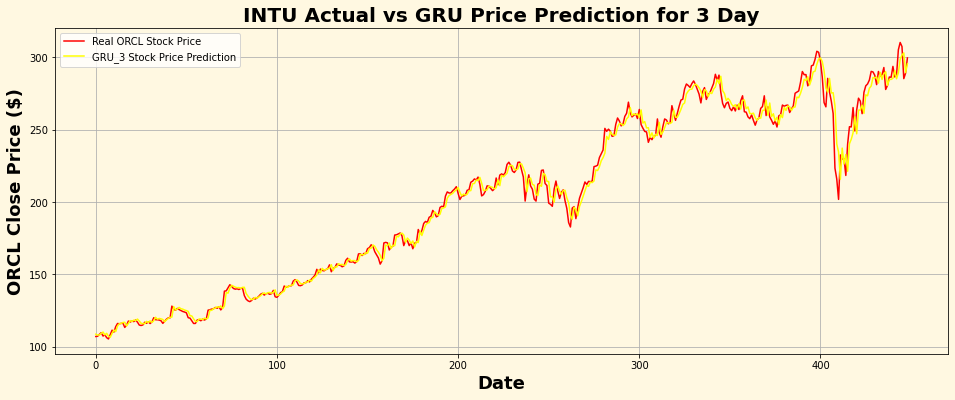

In [78]:
plt.figure(figsize = (16,6), facecolor = '#fff8e1')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#fff8e1')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real ORCL Stock Price')
plt.plot(GRU_3_Stock_Price_Prediction, color = 'yellow', label = 'GRU_3 Stock Price Prediction')
plt.title('INTU Actual vs GRU Price Prediction for 3 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show


In [79]:
print ('R Squared =',r2_score(y_test_3, GRU_3_Stock_Price_Prediction))

R Squared = 0.9898869952865798


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Error: 3.9115582270529545


In [81]:
def mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction): 
    y_test_3, GRU_3_Stock_Price_Prediction = np.array(y_test_3), np.array(GRU_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - GRU_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.8205338672445683


In [82]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction))


Mean Squared Error: 35.719758693013354


In [83]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction)))

Root Mean Squared Error: 5.976600931383436


#** >>>>>>>>>>>>>> Thank You <<<<<<<<<<<<<<<**

#**The End of 3 Days Price Prediction**